In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from utils.dataset import get_dataloaders
from utils.metrics import evaluate_model  # Ensure it returns: report, accuracy, matrix

from models.vgg import CustomVGG
from models.resnet import CustomResNet
from models.mobilenet import CustomMobileNet
from models.inception import CustomInception
from models.densenet import CustomDenseNet

# Configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#device = torch.device('cpu')

In [2]:
data_dir = r'C:\Users\shahd\OneDrive\Desktop\cv_assignment4\Pets-Expression-Classification-with-custom-CNN-architectures\Pets\Master Folder'
train_loader, val_loader, class_names = get_dataloaders(data_dir)
num_classes = len(class_names)


In [19]:
model_map = {
    'vgg': CustomVGG,
    'resnet': CustomResNet,
    'mobilenet': CustomMobileNet,
    'inception': CustomInception,
    'densenet': CustomDenseNet
}
model_name = 'resnet'  # Change to: vgg, resnet, mobilenet, inception, densenet
model = model_map[model_name](num_classes=num_classes).to(device)


In [3]:
def train_and_evaluate_model(model_name, model_class, num_classes, device, 
                             train_loader, val_loader, class_names, epochs=10, lr=1e-3):
    print(f"\n==== Training {model_name.upper()} model ====")
    model = model_class(num_classes=num_classes).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

    best_acc = 0
    train_losses = []
    val_accuracies = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0

        for imgs, labels in train_loader:
            imgs, labels = imgs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        
        avg_loss = running_loss / len(train_loader)
        train_losses.append(avg_loss)

        print(f"\nEpoch [{epoch+1}/{epochs}] - Training Loss: {avg_loss:.4f}")

        # Evaluation
        report, accuracy, matrix = evaluate_model(model, val_loader, device, class_names)
        val_accuracies.append(accuracy)

        print("\nValidation Classification Report:\n", report)
        print("\nConfusion Matrix:")
        print(matrix)

        # Plot confusion matrix for each epoch
        plot_confusion_matrix(matrix, class_names, f"{model_name} - Epoch {epoch+1}")

        # Save best model
        if accuracy > best_acc:
            best_acc = accuracy
            torch.save(model.state_dict(), f'best_model_{model_name}.pth')
            print(f"New best model saved (Accuracy: {best_acc:.4f})")

        scheduler.step()

    # Plot final training loss and accuracy
    plot_training_curves(train_losses, val_accuracies, model_name)

    # Print final accuracy
    print(f"\nTraining complete. Best validation accuracy: {best_acc:.4f}\n")

    del model
    torch.cuda.empty_cache()


def plot_confusion_matrix(cm, class_names, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()


def plot_training_curves(train_losses, val_accuracies, model_name):
    epochs_range = range(1, len(train_losses) + 1)
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_losses, marker='o', color='blue', label='Training Loss')
    plt.title(f"{model_name.upper()} - Training Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, val_accuracies, marker='x', color='green', label='Validation Accuracy')
    plt.title(f"{model_name.upper()} - Validation Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.ylim(0, 1)
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()


==== Training MOBILENET model ====

Epoch [1/10] - Training Loss: 1.3870

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.2083    0.5556    0.3030         9
       Other     0.0000    0.0000    0.0000         6
         Sad     0.0000    0.0000    0.0000        10
       happy     0.4444    0.3636    0.4000        11

    accuracy                         0.2500        36
   macro avg     0.1632    0.2298    0.1758        36
weighted avg     0.1879    0.2500    0.1980        36


Confusion Matrix:
[[5 0 1 3]
 [5 0 0 1]
 [8 1 0 1]
 [6 0 1 4]]


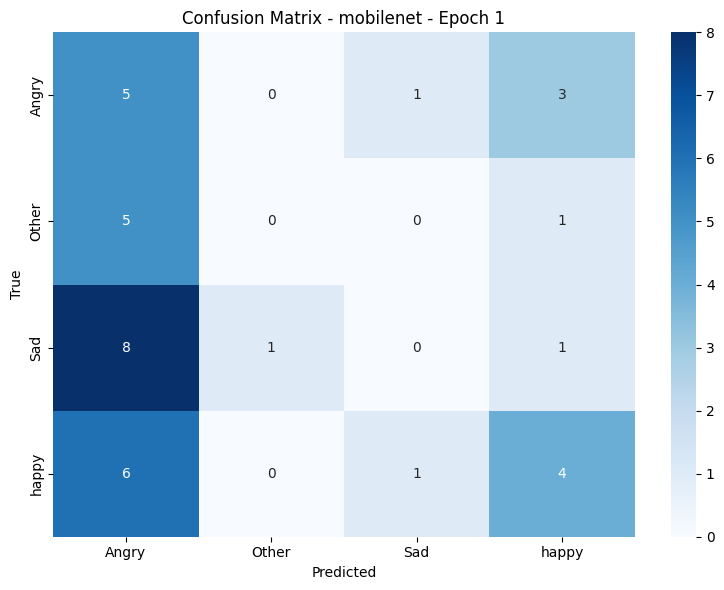

New best model saved (Accuracy: 0.2500)

Epoch [2/10] - Training Loss: 1.3468

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.0000    0.0000    0.0000         9
       Other     0.2727    0.5000    0.3529         6
         Sad     0.5000    0.2000    0.2857        10
       happy     0.4667    0.6364    0.5385        11

    accuracy                         0.3333        36
   macro avg     0.3098    0.3341    0.2943        36
weighted avg     0.3269    0.3333    0.3027        36


Confusion Matrix:
[[0 3 1 5]
 [1 3 1 1]
 [3 3 2 2]
 [2 2 0 7]]


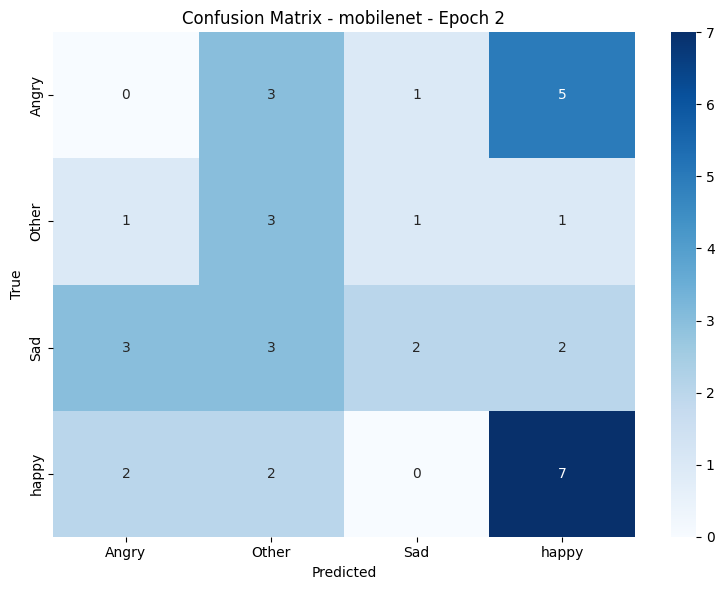

New best model saved (Accuracy: 0.3333)

Epoch [3/10] - Training Loss: 1.3058

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.1429    0.1111    0.1250         9
       Other     0.0000    0.0000    0.0000         6
         Sad     0.0000    0.0000    0.0000        10
       happy     0.3333    0.7273    0.4571        11

    accuracy                         0.2500        36
   macro avg     0.1190    0.2096    0.1455        36
weighted avg     0.1376    0.2500    0.1709        36


Confusion Matrix:
[[1 1 1 6]
 [0 0 1 5]
 [3 2 0 5]
 [3 0 0 8]]


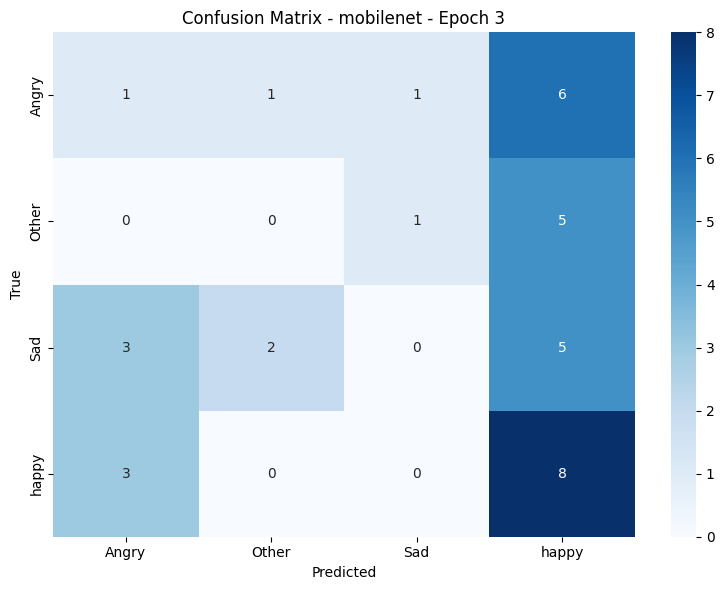


Epoch [4/10] - Training Loss: 1.3072

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.3750    0.3333    0.3529         9
       Other     0.2222    0.3333    0.2667         6
         Sad     0.6667    0.2000    0.3077        10
       happy     0.3750    0.5455    0.4444        11

    accuracy                         0.3611        36
   macro avg     0.4097    0.3530    0.3429        36
weighted avg     0.4306    0.3611    0.3540        36


Confusion Matrix:
[[3 2 0 4]
 [0 2 1 3]
 [3 2 2 3]
 [2 3 0 6]]


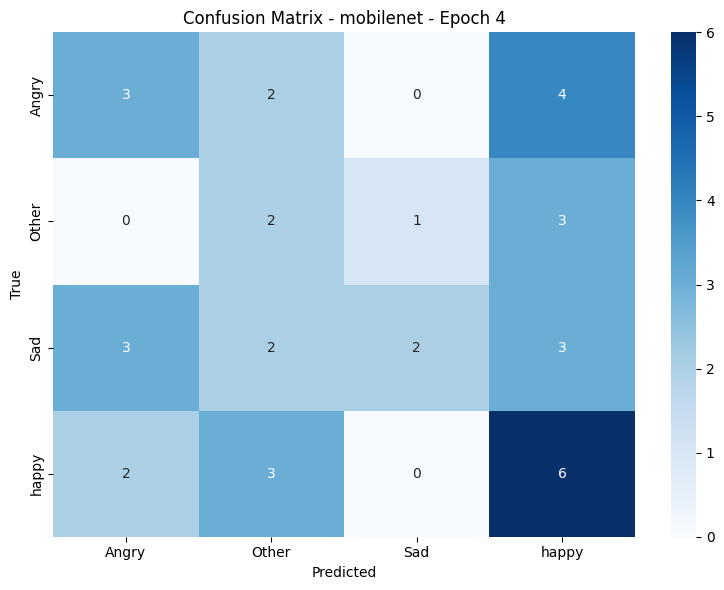

New best model saved (Accuracy: 0.3611)

Epoch [5/10] - Training Loss: 1.3009

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.0000    0.0000    0.0000         9
       Other     0.2857    0.6667    0.4000         6
         Sad     0.3333    0.3000    0.3158        10
       happy     0.4286    0.2727    0.3333        11

    accuracy                         0.2778        36
   macro avg     0.2619    0.3098    0.2623        36
weighted avg     0.2712    0.2778    0.2562        36


Confusion Matrix:
[[0 2 4 3]
 [0 4 1 1]
 [4 3 3 0]
 [2 5 1 3]]


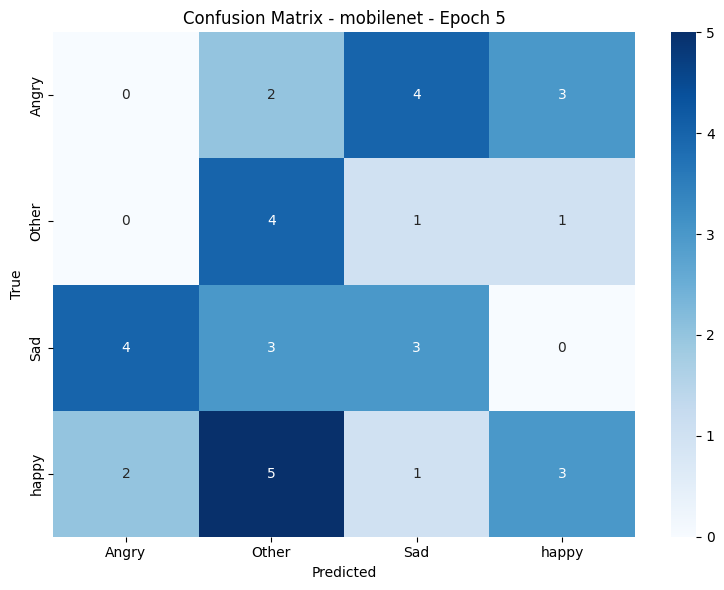


Epoch [6/10] - Training Loss: 1.2324

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.2500    0.3333    0.2857         9
       Other     0.2500    0.1667    0.2000         6
         Sad     0.2727    0.3000    0.2857        10
       happy     0.6667    0.5455    0.6000        11

    accuracy                         0.3611        36
   macro avg     0.3598    0.3364    0.3429        36
weighted avg     0.3836    0.3611    0.3675        36


Confusion Matrix:
[[3 1 3 2]
 [1 1 3 1]
 [5 2 3 0]
 [3 0 2 6]]


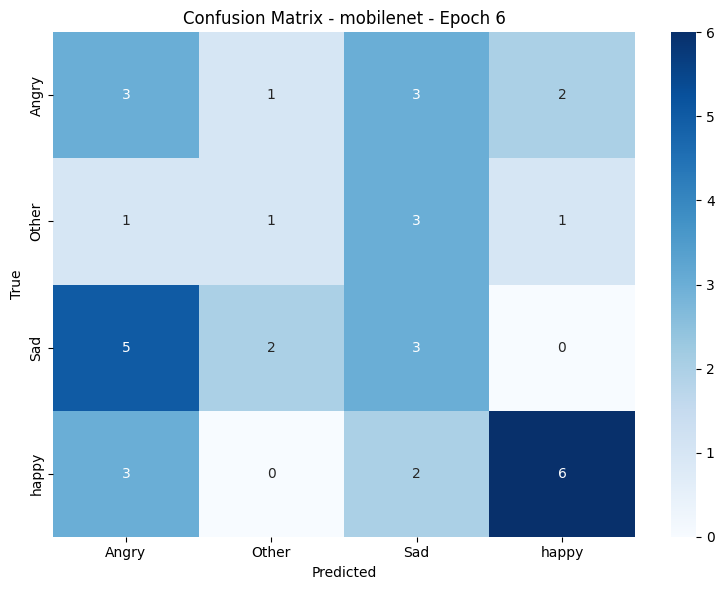


Epoch [7/10] - Training Loss: 1.2100

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.2857    0.4444    0.3478         9
       Other     0.1250    0.1667    0.1429         6
         Sad     0.2222    0.2000    0.2105        10
       happy     0.6000    0.2727    0.3750        11

    accuracy                         0.2778        36
   macro avg     0.3082    0.2710    0.2691        36
weighted avg     0.3373    0.2778    0.2838        36


Confusion Matrix:
[[4 2 2 1]
 [2 1 2 1]
 [5 3 2 0]
 [3 2 3 3]]


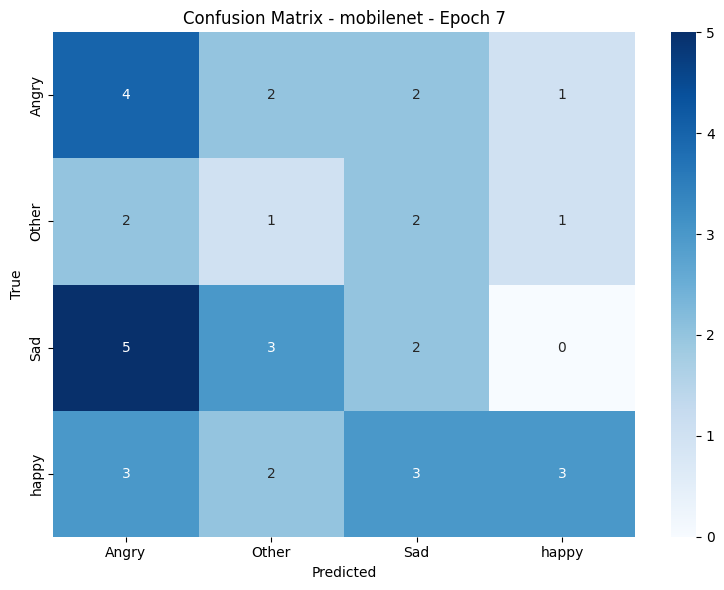


Epoch [8/10] - Training Loss: 1.2092

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.2308    0.3333    0.2727         9
       Other     0.1429    0.1667    0.1538         6
         Sad     0.1818    0.2000    0.1905        10
       happy     0.6000    0.2727    0.3750        11

    accuracy                         0.2500        36
   macro avg     0.2889    0.2432    0.2480        36
weighted avg     0.3153    0.2500    0.2613        36


Confusion Matrix:
[[3 1 4 1]
 [2 1 2 1]
 [5 3 2 0]
 [3 2 3 3]]


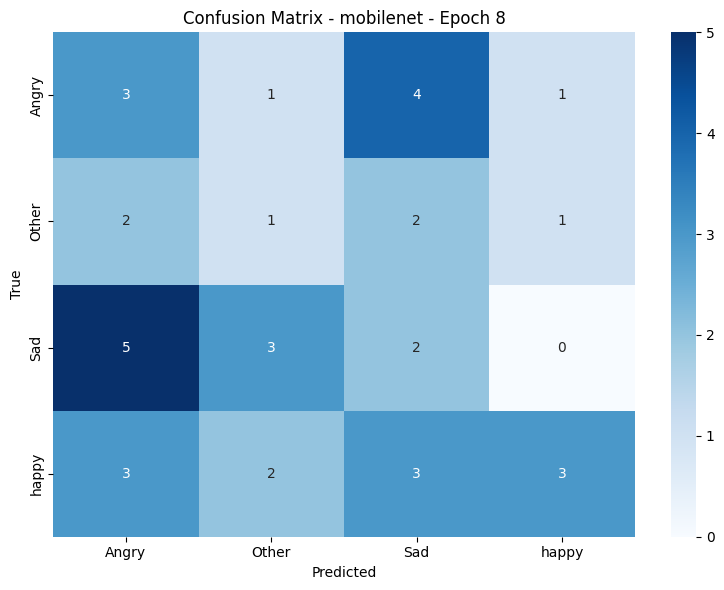


Epoch [9/10] - Training Loss: 1.2029

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.2857    0.4444    0.3478         9
       Other     0.1667    0.1667    0.1667         6
         Sad     0.2222    0.2000    0.2105        10
       happy     0.5714    0.3636    0.4444        11

    accuracy                         0.3056        36
   macro avg     0.3115    0.2937    0.2924        36
weighted avg     0.3355    0.3056    0.3090        36


Confusion Matrix:
[[4 1 2 2]
 [2 1 2 1]
 [5 3 2 0]
 [3 1 3 4]]


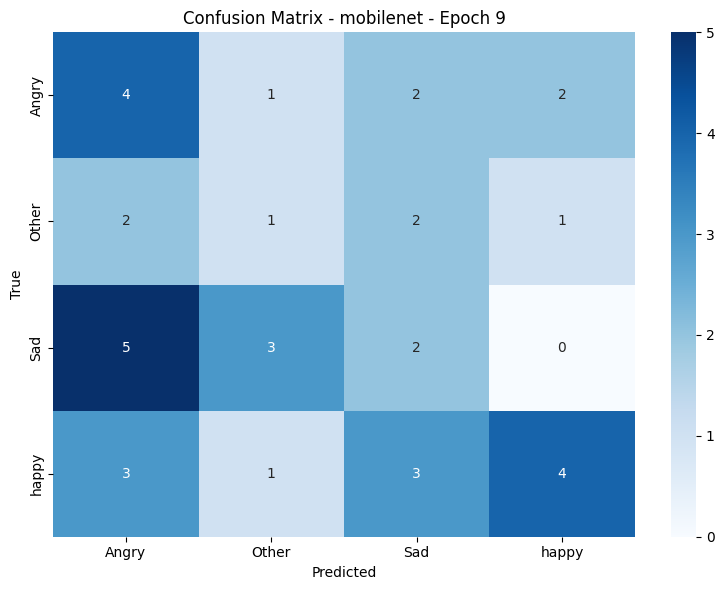


Epoch [10/10] - Training Loss: 1.1869

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.2308    0.3333    0.2727         9
       Other     0.1429    0.1667    0.1538         6
         Sad     0.2222    0.2000    0.2105        10
       happy     0.7143    0.4545    0.5556        11

    accuracy                         0.3056        36
   macro avg     0.3275    0.2886    0.2982        36
weighted avg     0.3615    0.3056    0.3221        36


Confusion Matrix:
[[3 2 3 1]
 [2 1 2 1]
 [5 3 2 0]
 [3 1 2 5]]


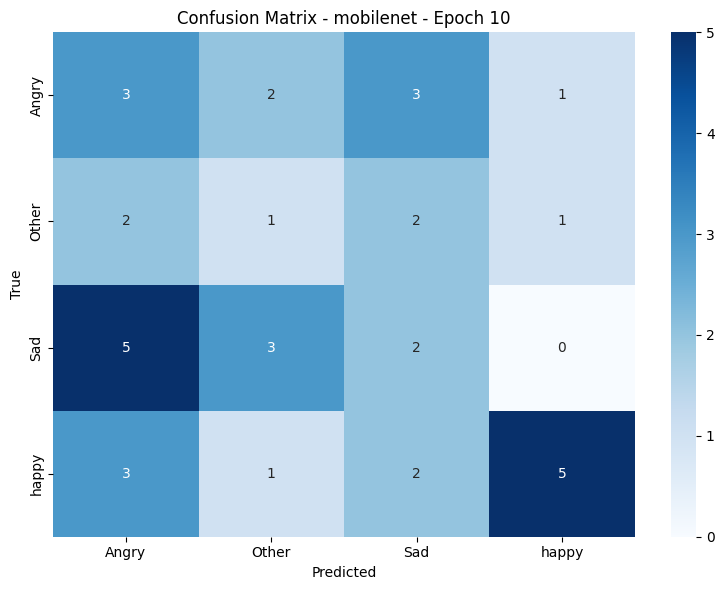

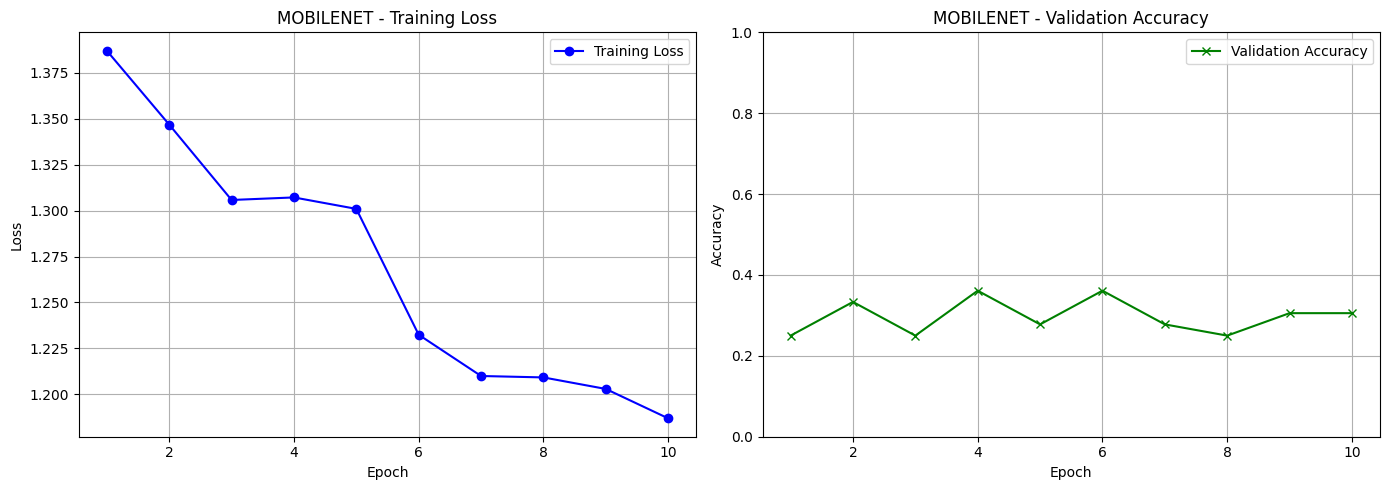


Training complete. Best validation accuracy: 0.3611



In [4]:
model_map = {
    'vgg': CustomVGG,
    'resnet': CustomResNet,
    'mobilenet': CustomMobileNet,
    'inception': CustomInception,
    'densenet': CustomDenseNet
}
model_name = 'mobilenet'  # Change to: vgg, resnet, mobilenet, inception, densenet
model_class = model_map[model_name]
#model = model_map[model_name](num_classes=num_classes).to(device)
train_and_evaluate_model(
        model_name=model_name,
        model_class=model_class,
        num_classes=num_classes,
        device=device,
        train_loader=train_loader,
        val_loader=val_loader,
        class_names=class_names,
        epochs=10,
        lr=1e-3
    )


==== Training RESNET model ====

Epoch [1/10] - Training Loss: 1.5217

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.4286    0.3333    0.3750         9
       Other     0.2857    0.3333    0.3077         6
         Sad     0.3636    0.8000    0.5000        10
       happy     0.0000    0.0000    0.0000        11

    accuracy                         0.3611        36
   macro avg     0.2695    0.3667    0.2957        36
weighted avg     0.2558    0.3611    0.2839        36


Confusion Matrix:
[[3 3 3 0]
 [0 2 4 0]
 [1 1 8 0]
 [3 1 7 0]]


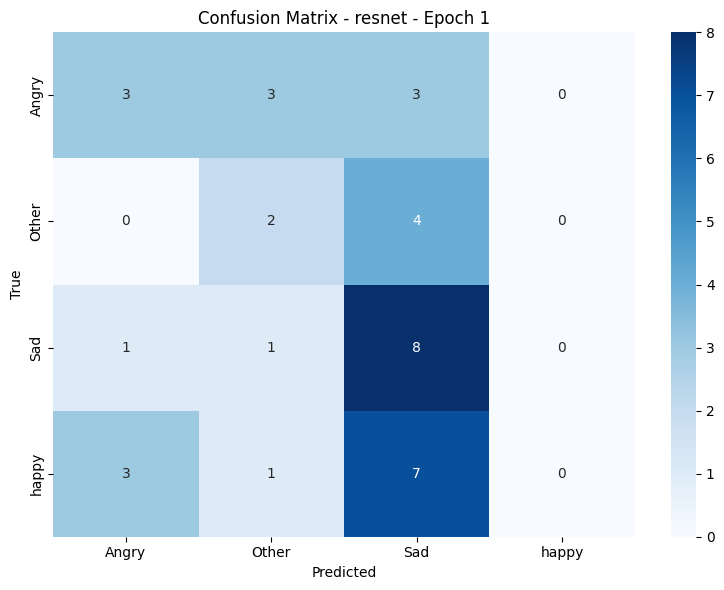

New best model saved (Accuracy: 0.3611)

Epoch [2/10] - Training Loss: 1.3601

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.2353    0.4444    0.3077         9
       Other     0.2000    0.1667    0.1818         6
         Sad     0.0000    0.0000    0.0000        10
       happy     0.4615    0.5455    0.5000        11

    accuracy                         0.3056        36
   macro avg     0.2242    0.2891    0.2474        36
weighted avg     0.2332    0.3056    0.2600        36


Confusion Matrix:
[[4 2 1 2]
 [3 1 0 2]
 [5 2 0 3]
 [5 0 0 6]]


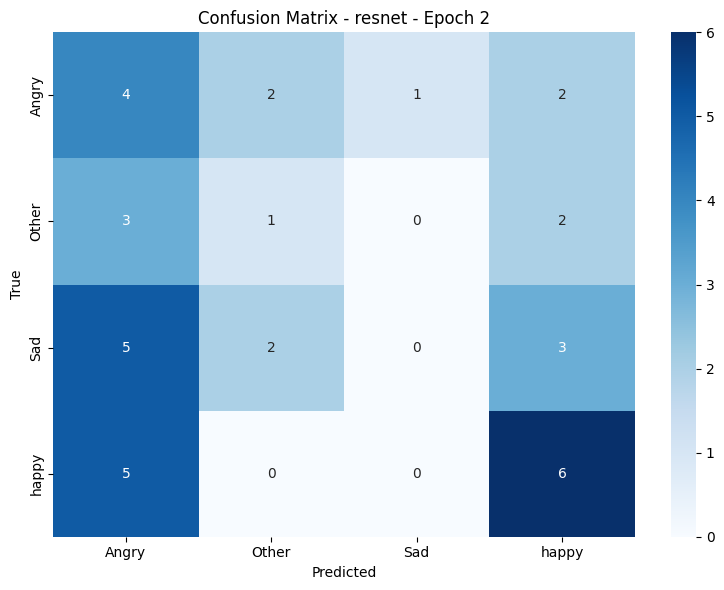


Epoch [3/10] - Training Loss: 1.3256

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.2857    0.2222    0.2500         9
       Other     0.1053    0.3333    0.1600         6
         Sad     0.0000    0.0000    0.0000        10
       happy     0.6667    0.1818    0.2857        11

    accuracy                         0.1667        36
   macro avg     0.2644    0.1843    0.1739        36
weighted avg     0.2927    0.1667    0.1765        36


Confusion Matrix:
[[2 4 2 1]
 [1 2 3 0]
 [3 7 0 0]
 [1 6 2 2]]


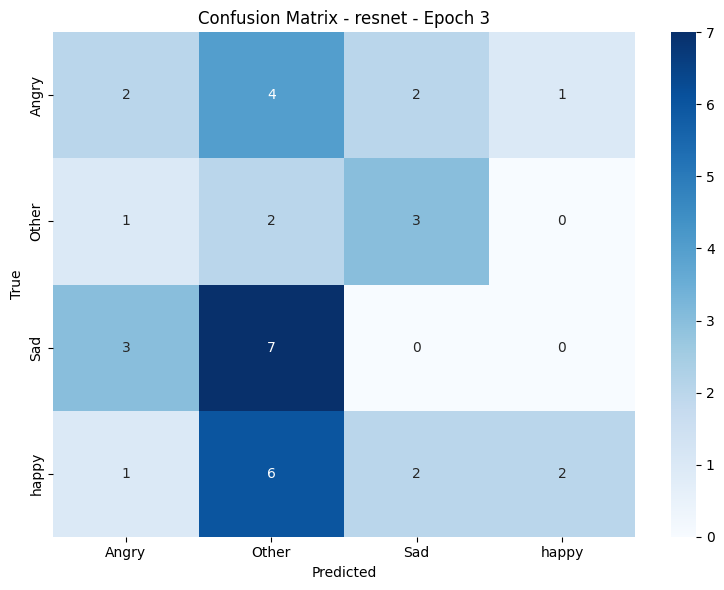


Epoch [4/10] - Training Loss: 1.3324

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.3333    0.2222    0.2667         9
       Other     0.1481    0.6667    0.2424         6
         Sad     0.5000    0.1000    0.1667        10
       happy     1.0000    0.0909    0.1667        11

    accuracy                         0.2222        36
   macro avg     0.4954    0.2699    0.2106        36
weighted avg     0.5525    0.2222    0.2043        36


Confusion Matrix:
[[2 7 0 0]
 [1 4 1 0]
 [2 7 1 0]
 [1 9 0 1]]


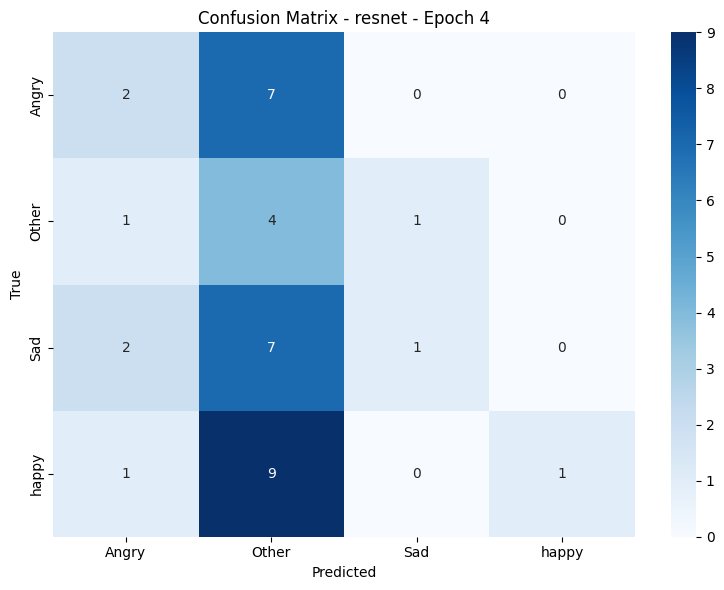


Epoch [5/10] - Training Loss: 1.3161

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.4286    0.3333    0.3750         9
       Other     0.1111    0.1667    0.1333         6
         Sad     0.1111    0.2000    0.1429        10
       happy     0.5000    0.0909    0.1538        11

    accuracy                         0.1944        36
   macro avg     0.2877    0.1977    0.2013        36
weighted avg     0.3093    0.1944    0.2027        36


Confusion Matrix:
[[3 3 3 0]
 [1 1 4 0]
 [2 5 2 1]
 [1 0 9 1]]


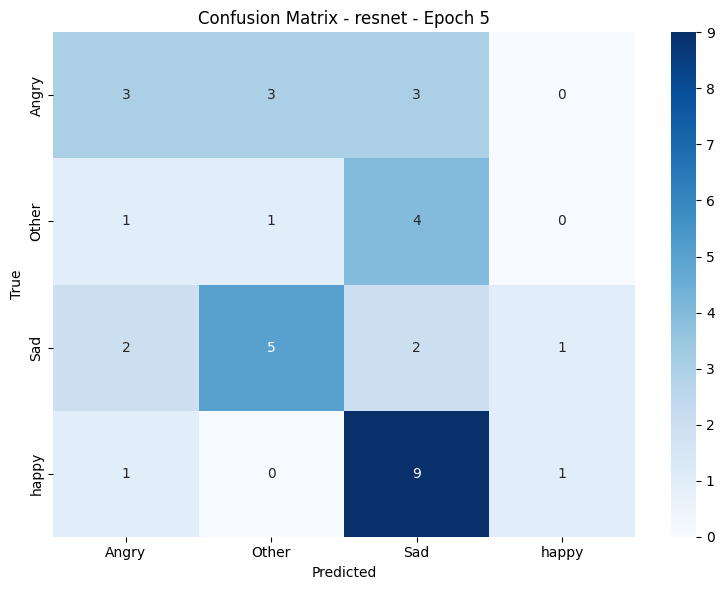


Epoch [6/10] - Training Loss: 1.2535

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.2667    0.4444    0.3333         9
       Other     0.0000    0.0000    0.0000         6
         Sad     0.0000    0.0000    0.0000        10
       happy     0.5000    0.5455    0.5217        11

    accuracy                         0.2778        36
   macro avg     0.1917    0.2475    0.2138        36
weighted avg     0.2194    0.2778    0.2428        36


Confusion Matrix:
[[4 0 3 2]
 [2 0 2 2]
 [5 3 0 2]
 [4 0 1 6]]


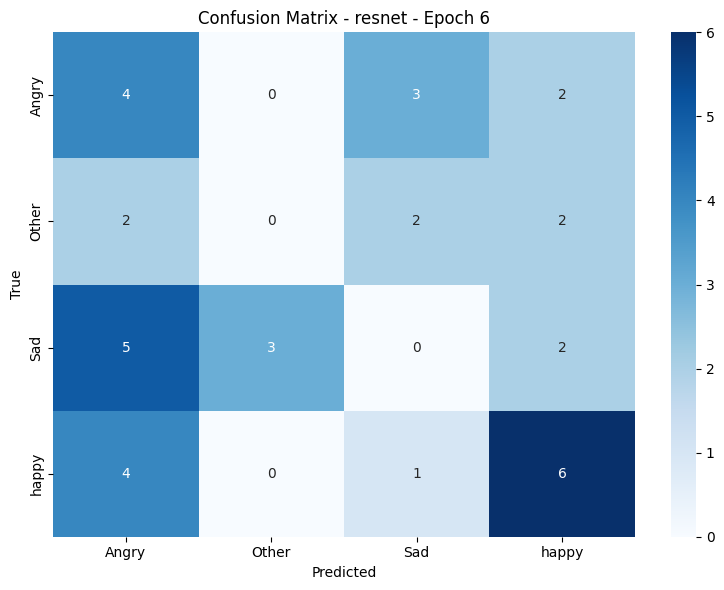


Epoch [7/10] - Training Loss: 1.2265

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.3125    0.5556    0.4000         9
       Other     0.2000    0.1667    0.1818         6
         Sad     0.0000    0.0000    0.0000        10
       happy     0.6667    0.5455    0.6000        11

    accuracy                         0.3333        36
   macro avg     0.2948    0.3169    0.2955        36
weighted avg     0.3152    0.3333    0.3136        36


Confusion Matrix:
[[5 0 3 1]
 [2 1 2 1]
 [5 4 0 1]
 [4 0 1 6]]


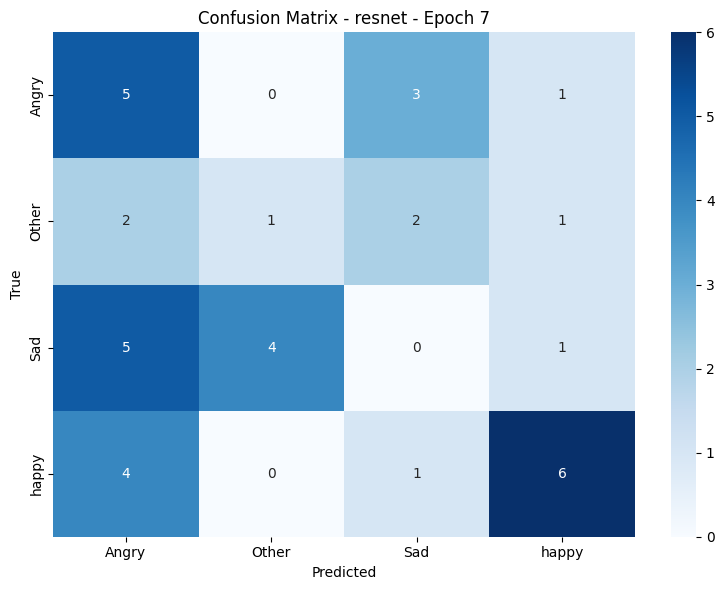


Epoch [8/10] - Training Loss: 1.2003

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.2778    0.5556    0.3704         9
       Other     0.0000    0.0000    0.0000         6
         Sad     0.0000    0.0000    0.0000        10
       happy     0.5714    0.3636    0.4444        11

    accuracy                         0.2500        36
   macro avg     0.2123    0.2298    0.2037        36
weighted avg     0.2440    0.2500    0.2284        36


Confusion Matrix:
[[5 0 3 1]
 [2 0 3 1]
 [5 4 0 1]
 [6 0 1 4]]


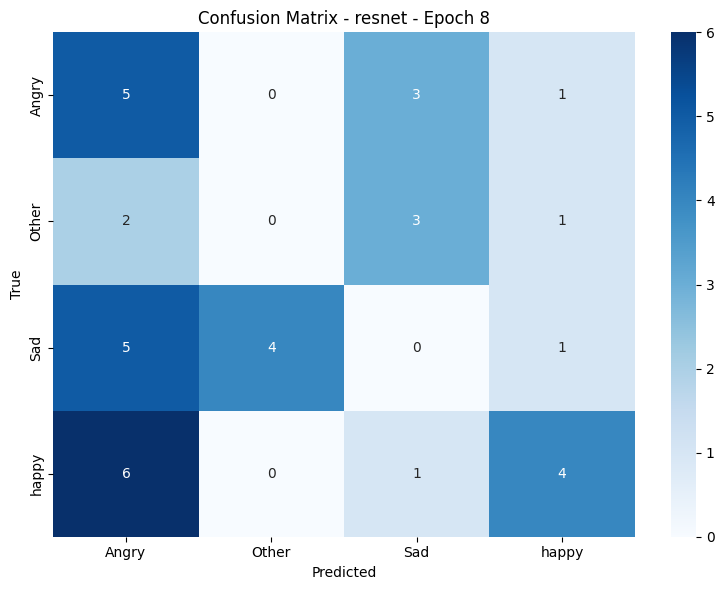


Epoch [9/10] - Training Loss: 1.1937

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.2500    0.5556    0.3448         9
       Other     0.0000    0.0000    0.0000         6
         Sad     0.0000    0.0000    0.0000        10
       happy     0.5714    0.3636    0.4444        11

    accuracy                         0.2500        36
   macro avg     0.2054    0.2298    0.1973        36
weighted avg     0.2371    0.2500    0.2220        36


Confusion Matrix:
[[5 0 3 1]
 [2 0 3 1]
 [7 2 0 1]
 [6 0 1 4]]


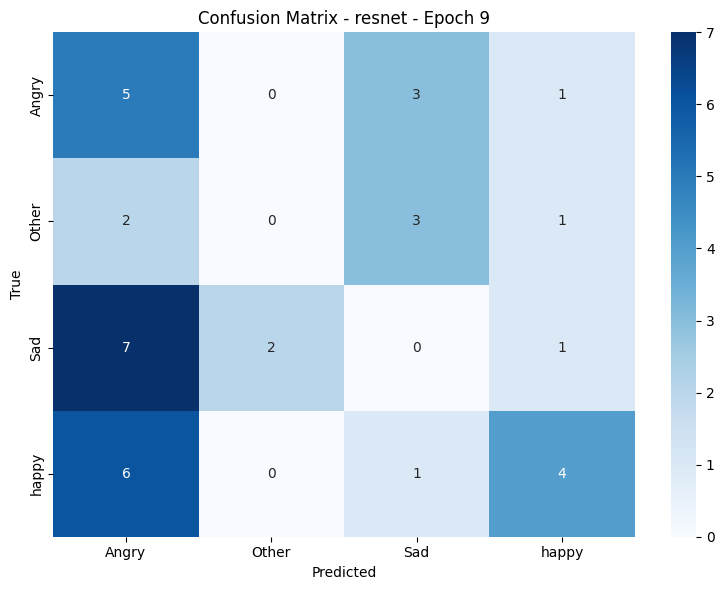


Epoch [10/10] - Training Loss: 1.1735

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.2667    0.4444    0.3333         9
       Other     0.1429    0.1667    0.1538         6
         Sad     0.0000    0.0000    0.0000        10
       happy     0.6667    0.5455    0.6000        11

    accuracy                         0.3056        36
   macro avg     0.2690    0.2891    0.2718        36
weighted avg     0.2942    0.3056    0.2923        36


Confusion Matrix:
[[4 2 2 1]
 [2 1 2 1]
 [5 4 0 1]
 [4 0 1 6]]


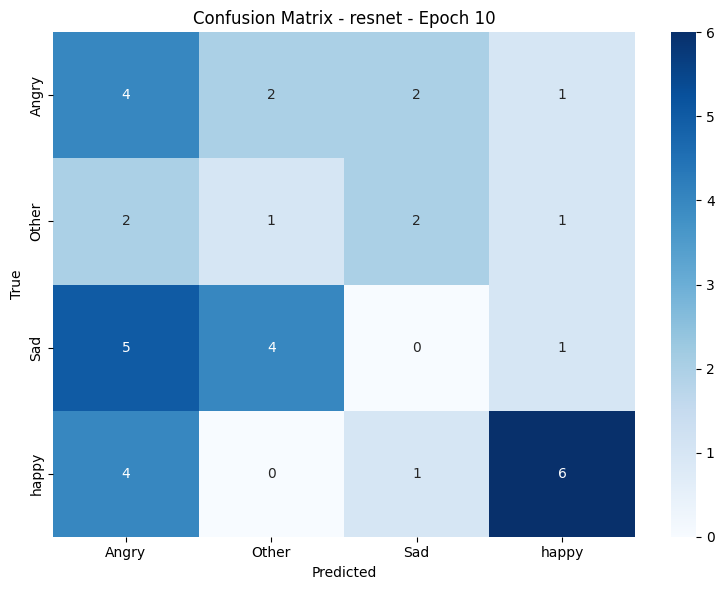

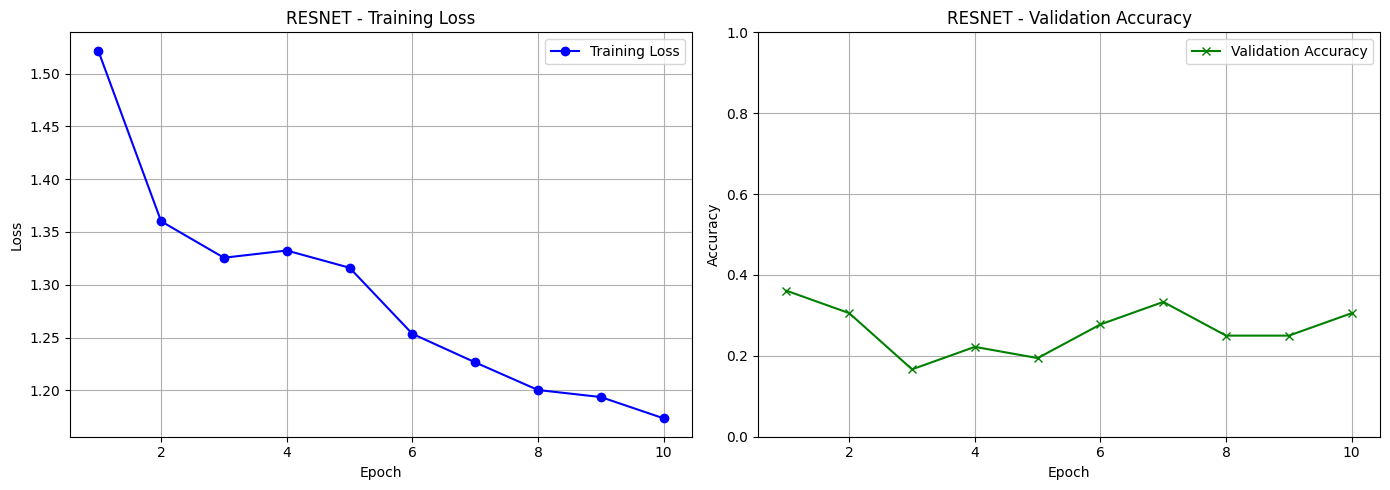


Training complete. Best validation accuracy: 0.3611



In [5]:
model_name = 'resnet'  # Change to: vgg, resnet, mobilenet, inception, densenet
model_class = model_map[model_name]
#model = model_map[model_name](num_classes=num_classes).to(device)
train_and_evaluate_model(
        model_name=model_name,
        model_class=model_class,
        num_classes=num_classes,
        device=device,
        train_loader=train_loader,
        val_loader=val_loader,
        class_names=class_names,
        epochs=10,
        lr=1e-3
    )


==== Training DENSENET model ====

Epoch [1/10] - Training Loss: 1.4064

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.2667    0.4444    0.3333         9
       Other     0.0000    0.0000    0.0000         6
         Sad     0.0000    0.0000    0.0000        10
       happy     0.4211    0.7273    0.5333        11

    accuracy                         0.3333        36
   macro avg     0.1719    0.2929    0.2167        36
weighted avg     0.1953    0.3333    0.2463        36


Confusion Matrix:
[[4 0 1 4]
 [4 0 0 2]
 [5 0 0 5]
 [2 0 1 8]]


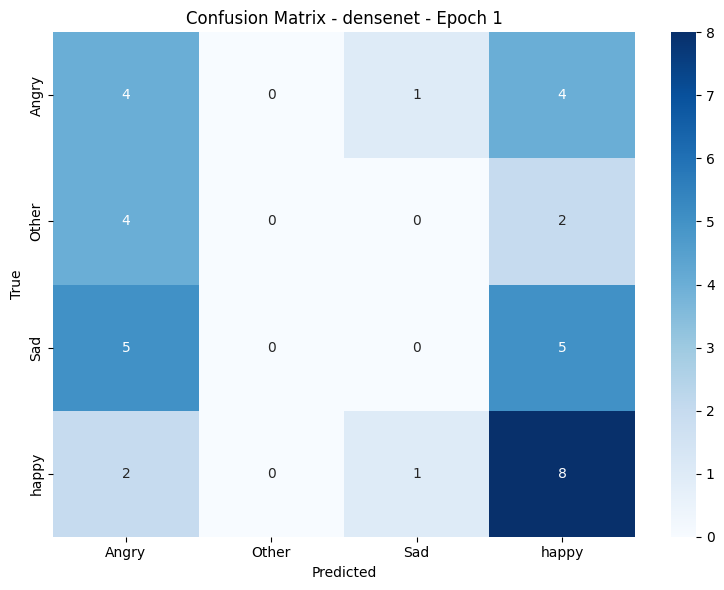

New best model saved (Accuracy: 0.3333)

Epoch [2/10] - Training Loss: 1.3918

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.2000    0.1111    0.1429         9
       Other     0.2000    0.5000    0.2857         6
         Sad     0.0000    0.0000    0.0000        10
       happy     0.4286    0.5455    0.4800        11

    accuracy                         0.2778        36
   macro avg     0.2071    0.2891    0.2271        36
weighted avg     0.2143    0.2778    0.2300        36


Confusion Matrix:
[[1 4 1 3]
 [1 3 0 2]
 [2 5 0 3]
 [1 3 1 6]]


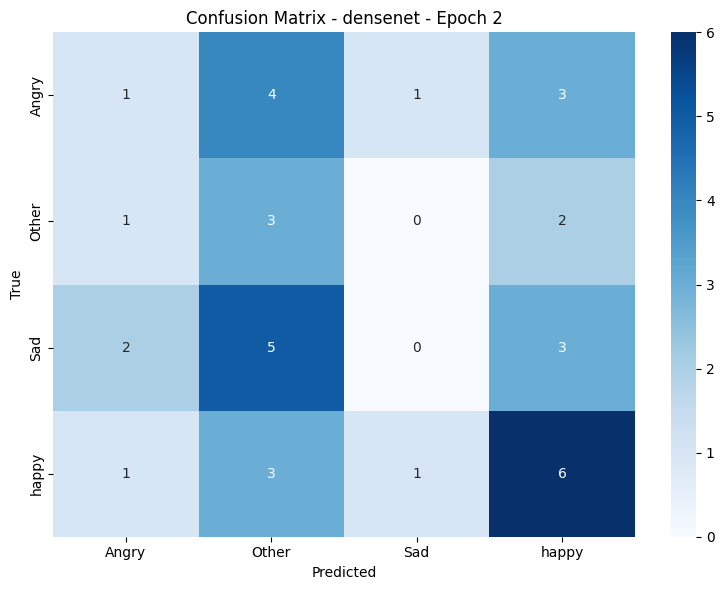


Epoch [3/10] - Training Loss: 1.3860

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.5000    0.1111    0.1818         9
       Other     0.2500    0.5000    0.3333         6
         Sad     0.3333    0.2000    0.2500        10
       happy     0.4375    0.6364    0.5185        11

    accuracy                         0.3611        36
   macro avg     0.3802    0.3619    0.3209        36
weighted avg     0.3929    0.3611    0.3289        36


Confusion Matrix:
[[1 3 2 3]
 [0 3 1 2]
 [1 3 2 4]
 [0 3 1 7]]


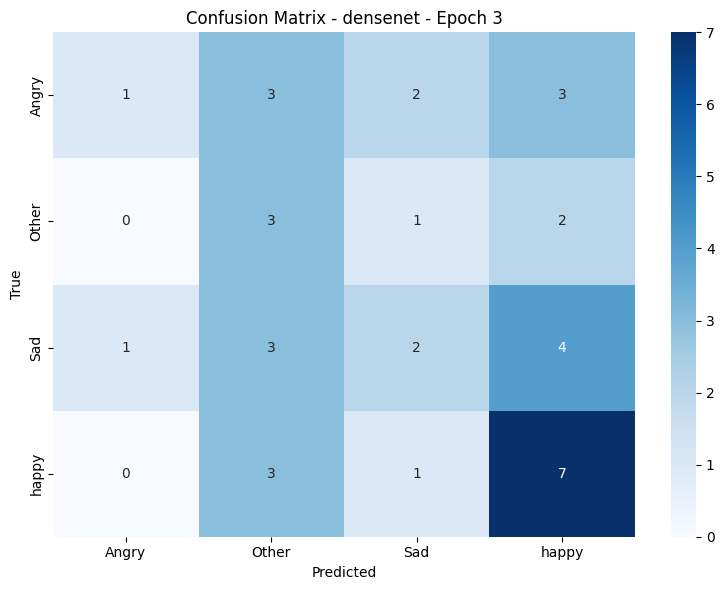

New best model saved (Accuracy: 0.3611)

Epoch [4/10] - Training Loss: 1.3835

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.2500    0.1111    0.1538         9
       Other     0.1429    0.3333    0.2000         6
         Sad     0.3333    0.1000    0.1538        10
       happy     0.4000    0.5455    0.4615        11

    accuracy                         0.2778        36
   macro avg     0.2815    0.2725    0.2423        36
weighted avg     0.3011    0.2778    0.2556        36


Confusion Matrix:
[[1 4 0 4]
 [0 2 1 3]
 [2 5 1 2]
 [1 3 1 6]]


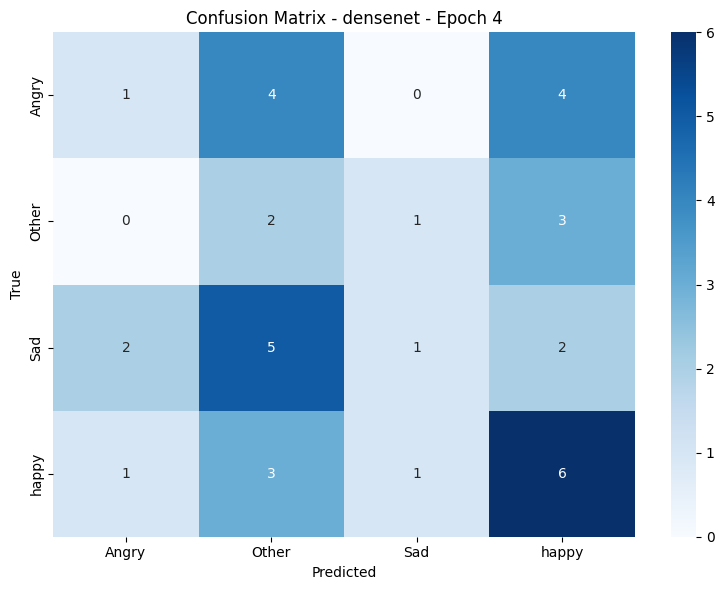


Epoch [5/10] - Training Loss: 1.3816

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.2667    0.4444    0.3333         9
       Other     0.0000    0.0000    0.0000         6
         Sad     0.2857    0.2000    0.2353        10
       happy     0.4545    0.4545    0.4545        11

    accuracy                         0.3056        36
   macro avg     0.2517    0.2747    0.2558        36
weighted avg     0.2849    0.3056    0.2876        36


Confusion Matrix:
[[4 0 2 3]
 [2 0 2 2]
 [6 1 2 1]
 [3 2 1 5]]


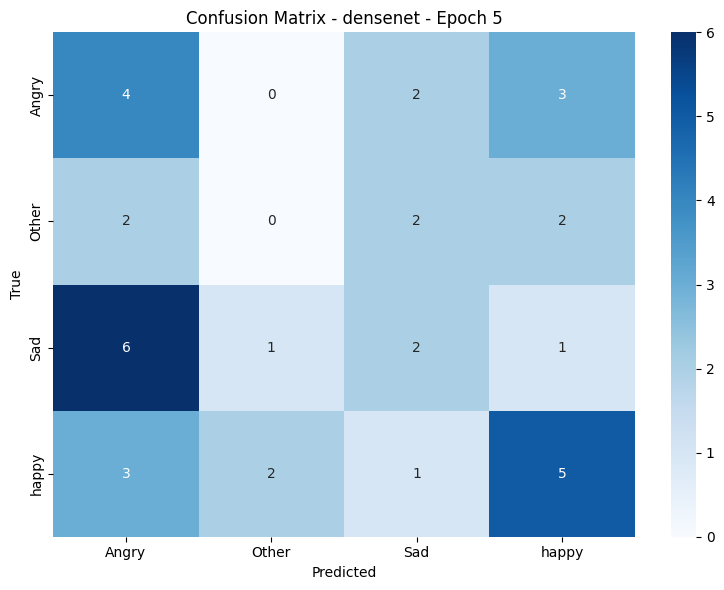


Epoch [6/10] - Training Loss: 1.3638

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.2500    0.4444    0.3200         9
       Other     0.1429    0.1667    0.1538         6
         Sad     0.3333    0.2000    0.2500        10
       happy     0.5714    0.3636    0.4444        11

    accuracy                         0.3056        36
   macro avg     0.3244    0.2937    0.2921        36
weighted avg     0.3535    0.3056    0.3109        36


Confusion Matrix:
[[4 0 2 3]
 [4 1 1 0]
 [5 3 2 0]
 [3 3 1 4]]


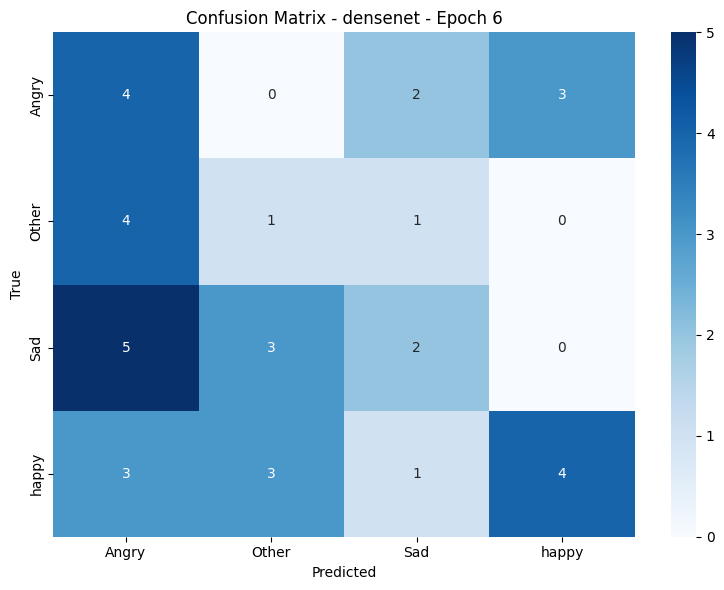


Epoch [7/10] - Training Loss: 1.3596

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.2500    0.3333    0.2857         9
       Other     0.0000    0.0000    0.0000         6
         Sad     0.3000    0.3000    0.3000        10
       happy     0.5000    0.3636    0.4211        11

    accuracy                         0.2778        36
   macro avg     0.2625    0.2492    0.2517        36
weighted avg     0.2986    0.2778    0.2834        36


Confusion Matrix:
[[3 0 4 2]
 [2 0 2 2]
 [4 3 3 0]
 [3 3 1 4]]


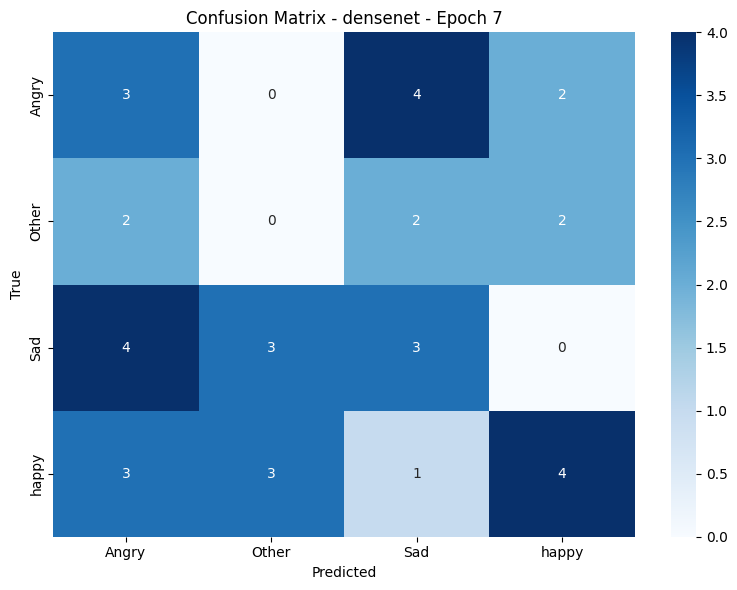


Epoch [8/10] - Training Loss: 1.3577

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.2500    0.3333    0.2857         9
       Other     0.0000    0.0000    0.0000         6
         Sad     0.3333    0.3000    0.3158        10
       happy     0.4444    0.3636    0.4000        11

    accuracy                         0.2778        36
   macro avg     0.2569    0.2492    0.2504        36
weighted avg     0.2909    0.2778    0.2814        36


Confusion Matrix:
[[3 0 3 3]
 [2 0 2 2]
 [4 3 3 0]
 [3 3 1 4]]


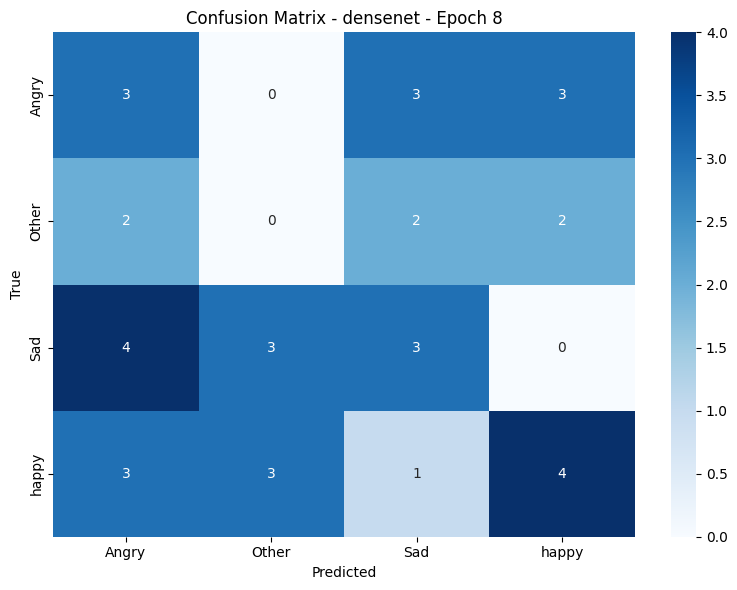


Epoch [9/10] - Training Loss: 1.3581

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.2500    0.3333    0.2857         9
       Other     0.0000    0.0000    0.0000         6
         Sad     0.2727    0.3000    0.2857        10
       happy     0.5714    0.3636    0.4444        11

    accuracy                         0.2778        36
   macro avg     0.2735    0.2492    0.2540        36
weighted avg     0.3129    0.2778    0.2866        36


Confusion Matrix:
[[3 0 4 2]
 [2 0 3 1]
 [4 3 3 0]
 [3 3 1 4]]


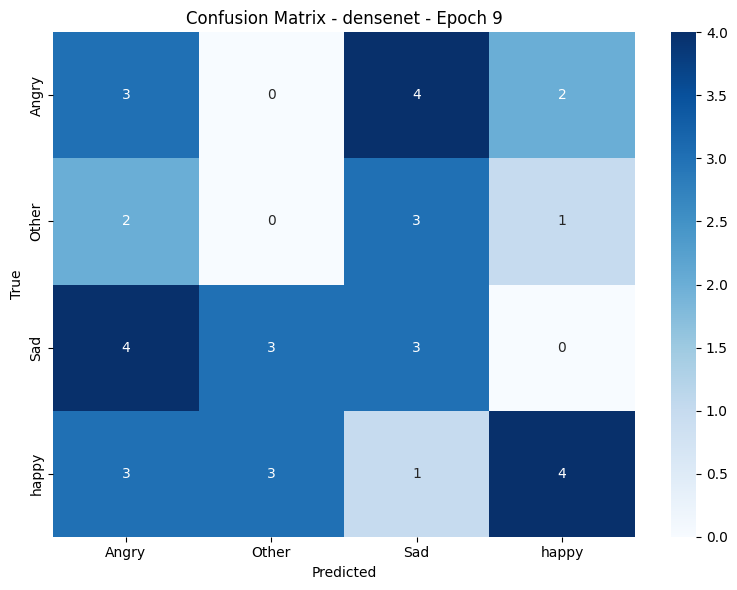


Epoch [10/10] - Training Loss: 1.3583

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.2500    0.3333    0.2857         9
       Other     0.0000    0.0000    0.0000         6
         Sad     0.3333    0.3000    0.3158        10
       happy     0.4444    0.3636    0.4000        11

    accuracy                         0.2778        36
   macro avg     0.2569    0.2492    0.2504        36
weighted avg     0.2909    0.2778    0.2814        36


Confusion Matrix:
[[3 0 3 3]
 [2 0 2 2]
 [4 3 3 0]
 [3 3 1 4]]


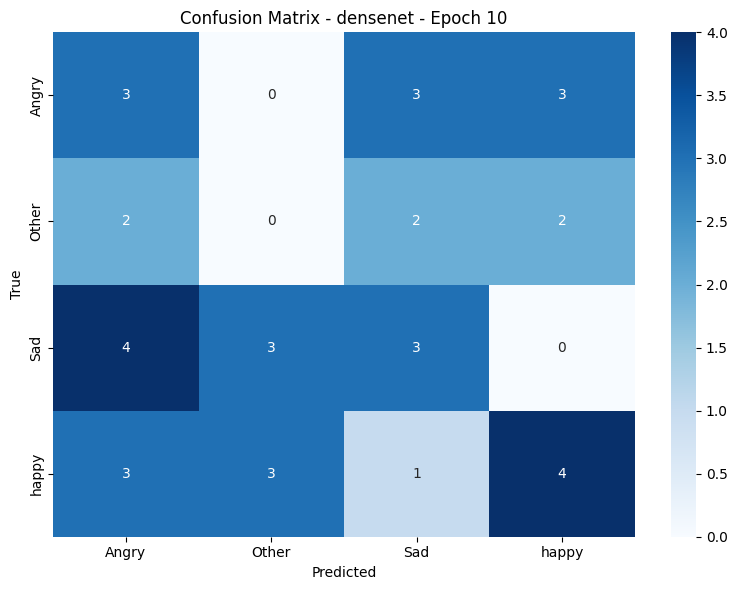

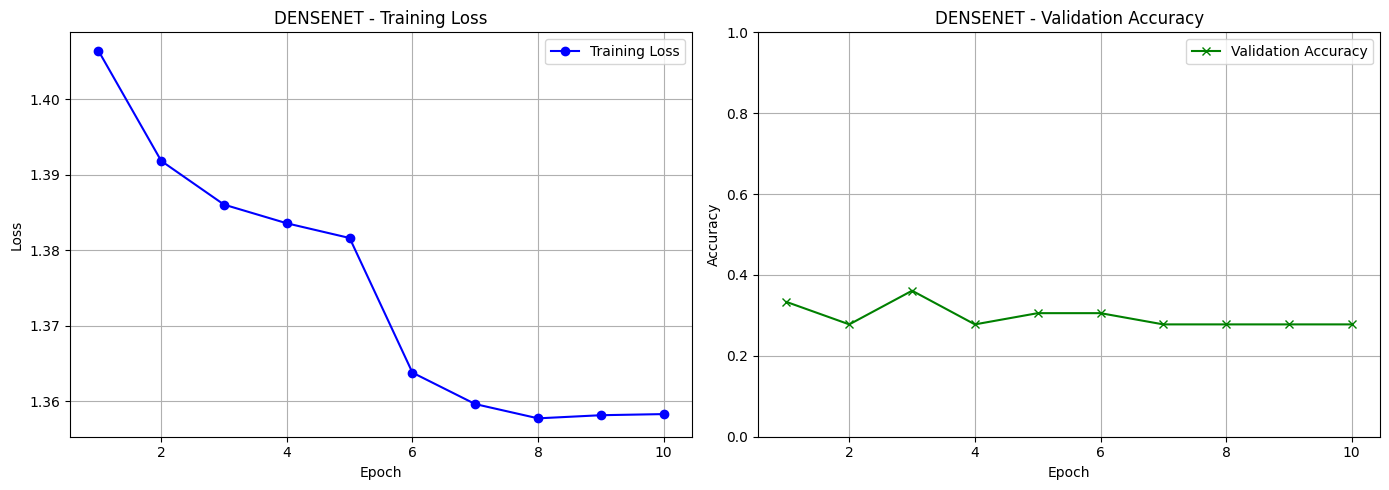


Training complete. Best validation accuracy: 0.3611



In [6]:
model_name = 'densenet'  # Change to: vgg, resnet, mobilenet, inception, densenet
model_class = model_map[model_name]
#model = model_map[model_name](num_classes=num_classes).to(device)
train_and_evaluate_model(
        model_name=model_name,
        model_class=model_class,
        num_classes=num_classes,
        device=device,
        train_loader=train_loader,
        val_loader=val_loader,
        class_names=class_names,
        epochs=10,
        lr=1e-3
    )


==== Training INCEPTION model ====

Epoch [1/10] - Training Loss: 1.4044

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.3333    0.2222    0.2667         9
       Other     0.1111    0.3333    0.1667         6
         Sad     0.3636    0.4000    0.3810        10
       happy     1.0000    0.0909    0.1667        11

    accuracy                         0.2500        36
   macro avg     0.4520    0.2616    0.2452        36
weighted avg     0.5084    0.2500    0.2512        36


Confusion Matrix:
[[2 5 2 0]
 [1 2 3 0]
 [1 5 4 0]
 [2 6 2 1]]


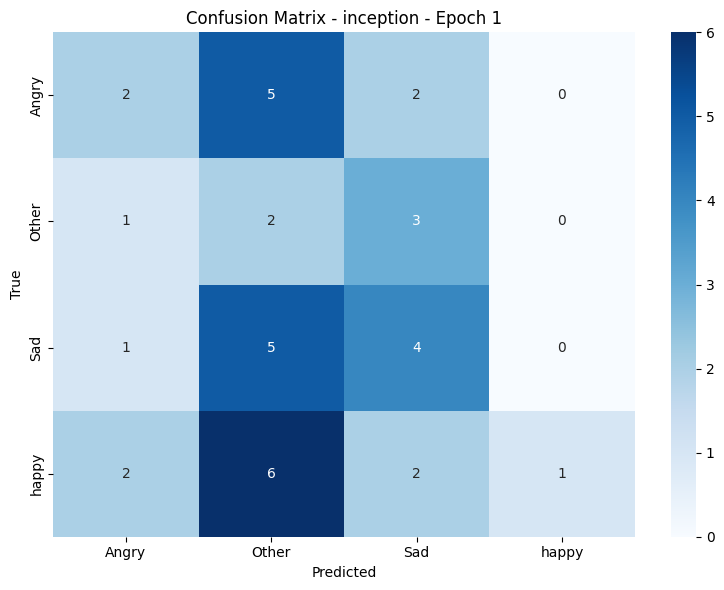

New best model saved (Accuracy: 0.2500)

Epoch [2/10] - Training Loss: 1.3967

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.1875    0.3333    0.2400         9
       Other     0.3000    0.5000    0.3750         6
         Sad     0.0000    0.0000    0.0000        10
       happy     0.4286    0.2727    0.3333        11

    accuracy                         0.2500        36
   macro avg     0.2290    0.2765    0.2371        36
weighted avg     0.2278    0.2500    0.2244        36


Confusion Matrix:
[[3 3 1 2]
 [1 3 1 1]
 [6 3 0 1]
 [6 1 1 3]]


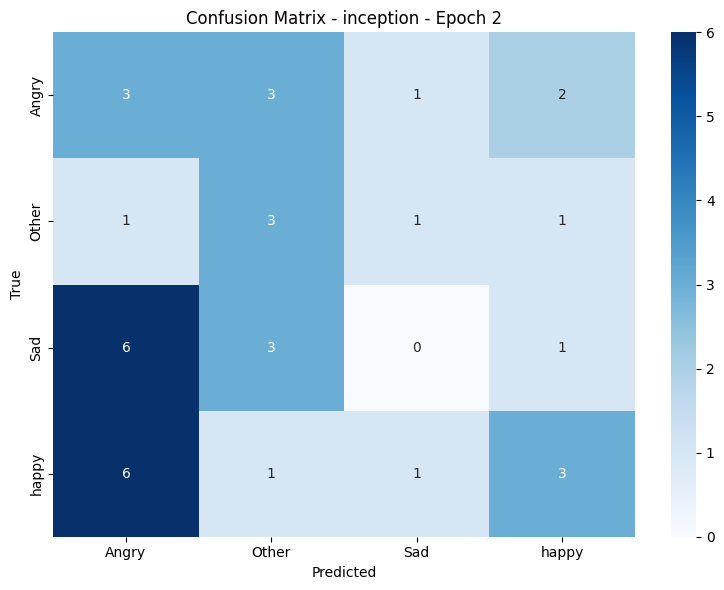


Epoch [3/10] - Training Loss: 1.3885

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.2727    0.6667    0.3871         9
       Other     0.0000    0.0000    0.0000         6
         Sad     0.5000    0.1000    0.1667        10
       happy     0.5000    0.5455    0.5217        11

    accuracy                         0.3611        36
   macro avg     0.3182    0.3280    0.2689        36
weighted avg     0.3598    0.3611    0.3025        36


Confusion Matrix:
[[6 0 0 3]
 [3 0 1 2]
 [8 0 1 1]
 [5 0 0 6]]


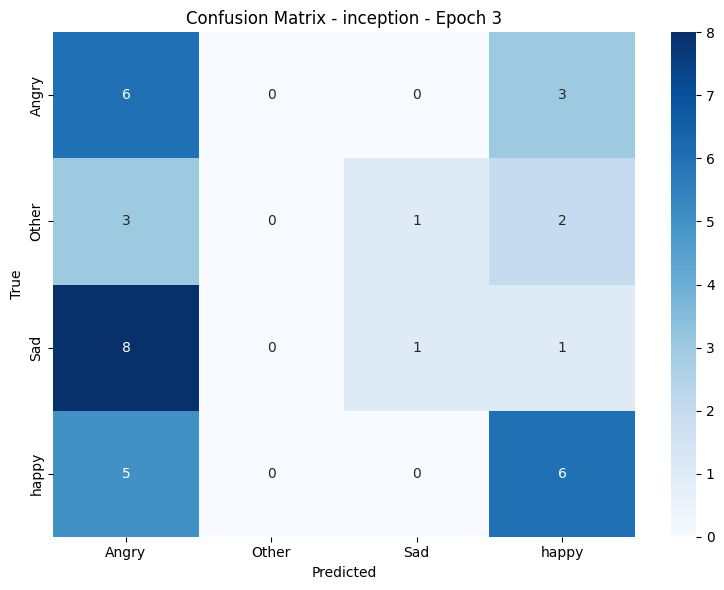

New best model saved (Accuracy: 0.3611)

Epoch [4/10] - Training Loss: 1.3862

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.0000    0.0000    0.0000         9
       Other     0.3000    0.5000    0.3750         6
         Sad     0.5000    0.1000    0.1667        10
       happy     0.3750    0.8182    0.5143        11

    accuracy                         0.3611        36
   macro avg     0.2938    0.3545    0.2640        36
weighted avg     0.3035    0.3611    0.2659        36


Confusion Matrix:
[[0 3 0 6]
 [0 3 1 2]
 [0 2 1 7]
 [0 2 0 9]]


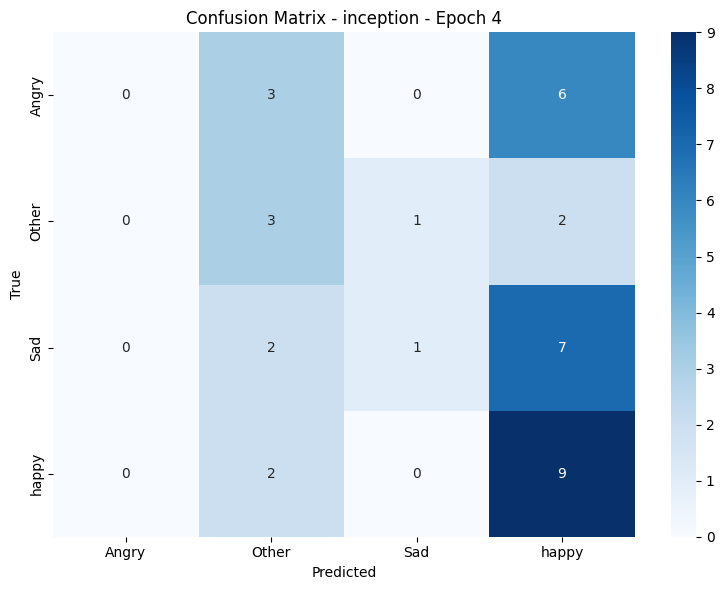


Epoch [5/10] - Training Loss: 1.3824

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.5000    0.1111    0.1818         9
       Other     0.2000    0.6667    0.3077         6
         Sad     0.0000    0.0000    0.0000        10
       happy     0.4167    0.4545    0.4348        11

    accuracy                         0.2778        36
   macro avg     0.2792    0.3081    0.2311        36
weighted avg     0.2856    0.2778    0.2296        36


Confusion Matrix:
[[1 4 1 3]
 [0 4 0 2]
 [1 7 0 2]
 [0 5 1 5]]


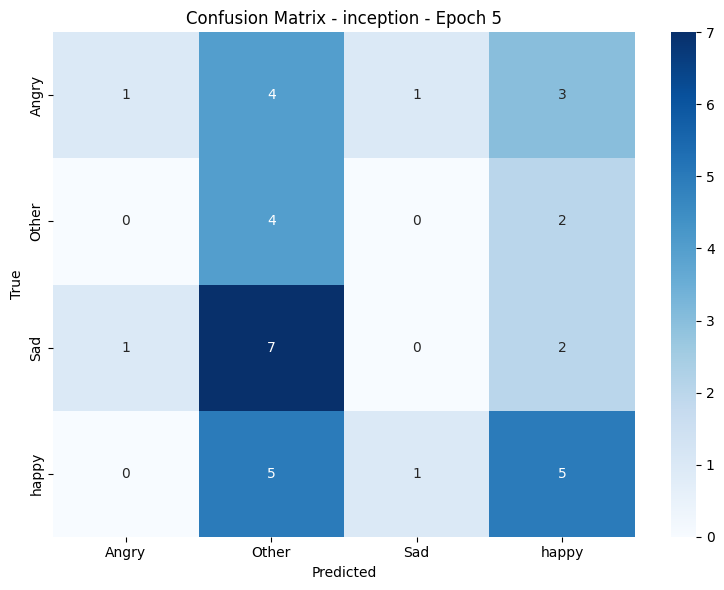


Epoch [6/10] - Training Loss: 1.3817

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.3333    0.1111    0.1667         9
       Other     0.2105    0.6667    0.3200         6
         Sad     0.0000    0.0000    0.0000        10
       happy     0.4167    0.4545    0.4348        11

    accuracy                         0.2778        36
   macro avg     0.2401    0.3081    0.2304        36
weighted avg     0.2457    0.2778    0.2279        36


Confusion Matrix:
[[1 4 1 3]
 [0 4 0 2]
 [1 7 0 2]
 [1 4 1 5]]


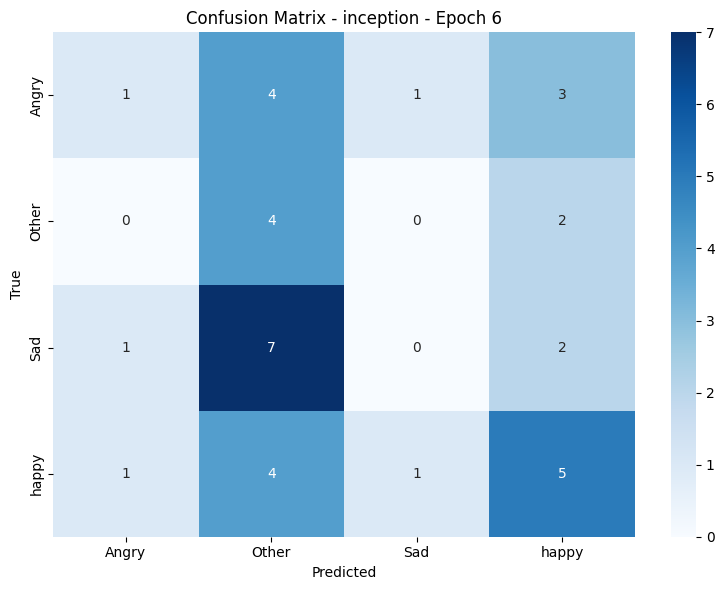


Epoch [7/10] - Training Loss: 1.3785

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.2000    0.1111    0.1429         9
       Other     0.1667    0.3333    0.2222         6
         Sad     0.4286    0.3000    0.3529        10
       happy     0.4167    0.4545    0.4348        11

    accuracy                         0.3056        36
   macro avg     0.3030    0.2997    0.2882        36
weighted avg     0.3241    0.3056    0.3036        36


Confusion Matrix:
[[1 3 2 3]
 [1 2 1 2]
 [1 4 3 2]
 [2 3 1 5]]


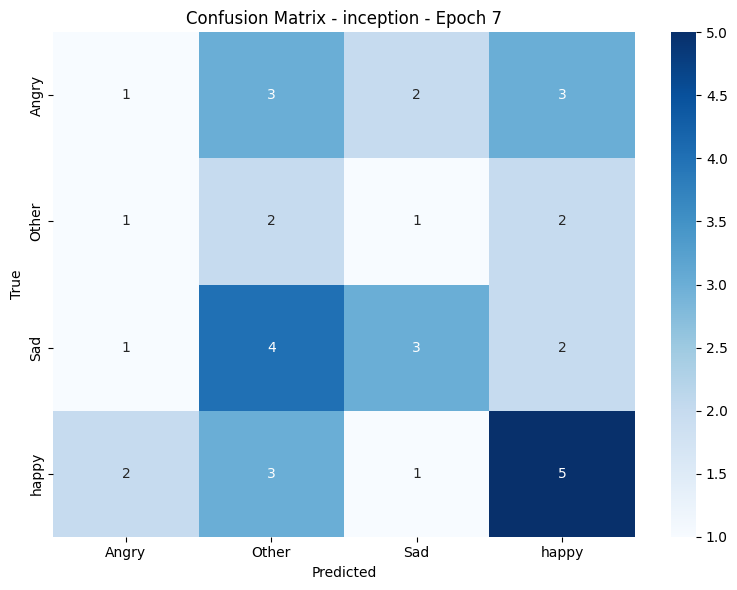


Epoch [8/10] - Training Loss: 1.3775

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.2000    0.1111    0.1429         9
       Other     0.1250    0.1667    0.1429         6
         Sad     0.4000    0.4000    0.4000        10
       happy     0.3846    0.4545    0.4167        11

    accuracy                         0.3056        36
   macro avg     0.2774    0.2831    0.2756        36
weighted avg     0.2995    0.3056    0.2979        36


Confusion Matrix:
[[1 2 3 3]
 [0 1 2 3]
 [2 2 4 2]
 [2 3 1 5]]


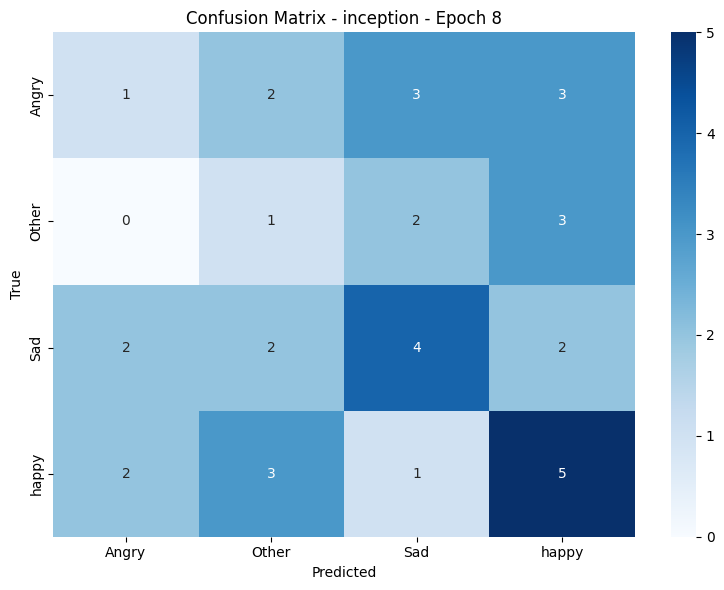


Epoch [9/10] - Training Loss: 1.3770

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.2000    0.1111    0.1429         9
       Other     0.2222    0.3333    0.2667         6
         Sad     0.4000    0.4000    0.4000        10
       happy     0.4167    0.4545    0.4348        11

    accuracy                         0.3333        36
   macro avg     0.3097    0.3247    0.3111        36
weighted avg     0.3255    0.3333    0.3241        36


Confusion Matrix:
[[1 2 3 3]
 [0 2 2 2]
 [2 2 4 2]
 [2 3 1 5]]


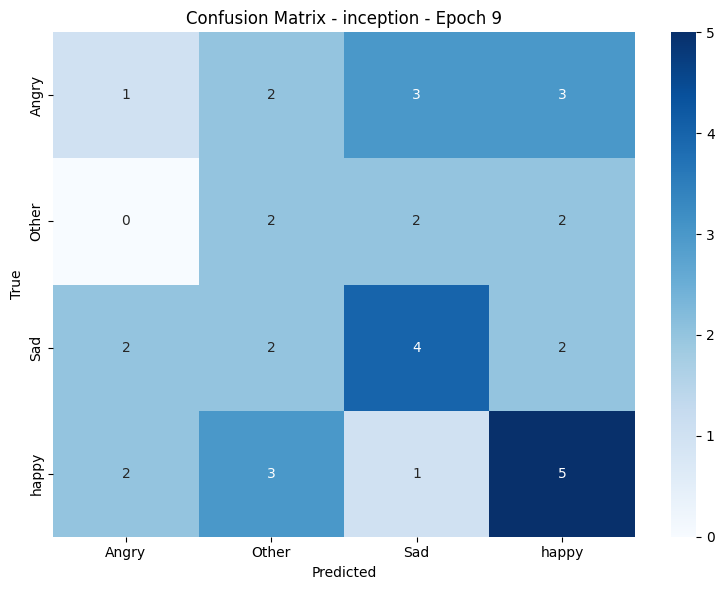


Epoch [10/10] - Training Loss: 1.3758

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.1667    0.1111    0.1333         9
       Other     0.1250    0.1667    0.1429         6
         Sad     0.4444    0.4000    0.4211        10
       happy     0.3846    0.4545    0.4167        11

    accuracy                         0.3056        36
   macro avg     0.2802    0.2831    0.2785        36
weighted avg     0.3035    0.3056    0.3014        36


Confusion Matrix:
[[1 2 3 3]
 [1 1 1 3]
 [2 2 4 2]
 [2 3 1 5]]


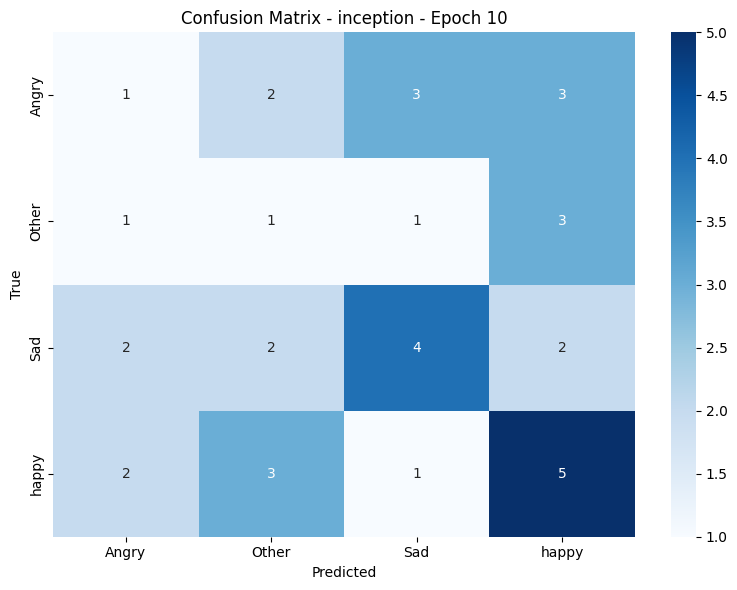

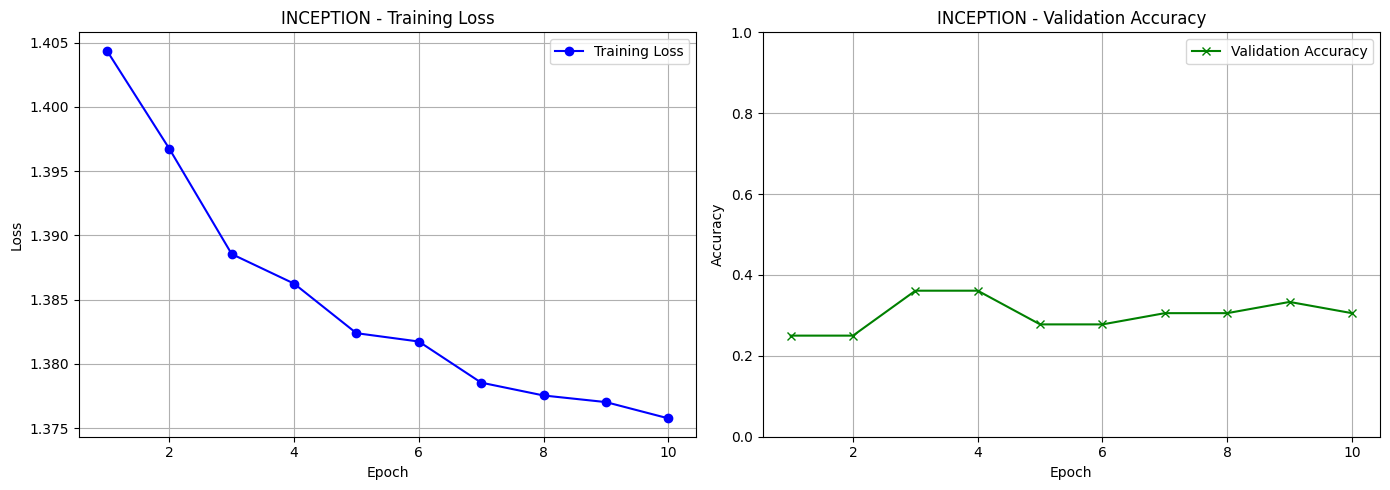


Training complete. Best validation accuracy: 0.3611



In [7]:
model_map = {
    'vgg': CustomVGG,
    'resnet': CustomResNet,
    'mobilenet': CustomMobileNet,
    'inception': CustomInception,
    'densenet': CustomDenseNet
}
model_name = 'inception'  # Change to: vgg, resnet, mobilenet, inception, densenet
model_class = model_map[model_name]
#model = model_map[model_name](num_classes=num_classes).to(device)
train_and_evaluate_model(
        model_name=model_name,
        model_class=model_class,
        num_classes=num_classes,
        device=device,
        train_loader=train_loader,
        val_loader=val_loader,
        class_names=class_names,
        epochs=10,
        lr=1e-3
    )


==== Training VGG model ====

Epoch [1/25] - Training Loss: 1.3920

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.0000    0.0000    0.0000         9
       Other     0.1667    1.0000    0.2857         6
         Sad     0.0000    0.0000    0.0000        10
       happy     0.0000    0.0000    0.0000        11

    accuracy                         0.1667        36
   macro avg     0.0417    0.2500    0.0714        36
weighted avg     0.0278    0.1667    0.0476        36


Confusion Matrix:
[[ 0  9  0  0]
 [ 0  6  0  0]
 [ 0 10  0  0]
 [ 0 11  0  0]]


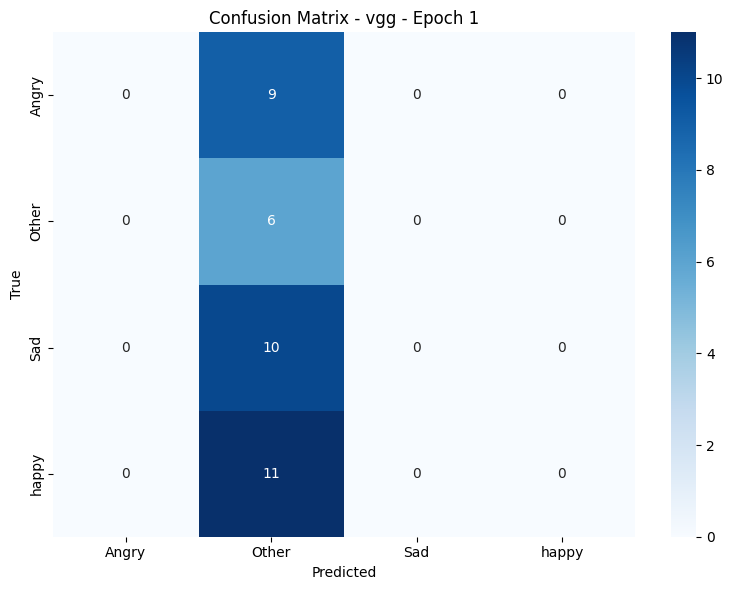

New best model saved (Accuracy: 0.1667)

Epoch [2/25] - Training Loss: 1.3869

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.2500    1.0000    0.4000         9
       Other     0.0000    0.0000    0.0000         6
         Sad     0.0000    0.0000    0.0000        10
       happy     0.0000    0.0000    0.0000        11

    accuracy                         0.2500        36
   macro avg     0.0625    0.2500    0.1000        36
weighted avg     0.0625    0.2500    0.1000        36


Confusion Matrix:
[[ 9  0  0  0]
 [ 6  0  0  0]
 [10  0  0  0]
 [11  0  0  0]]


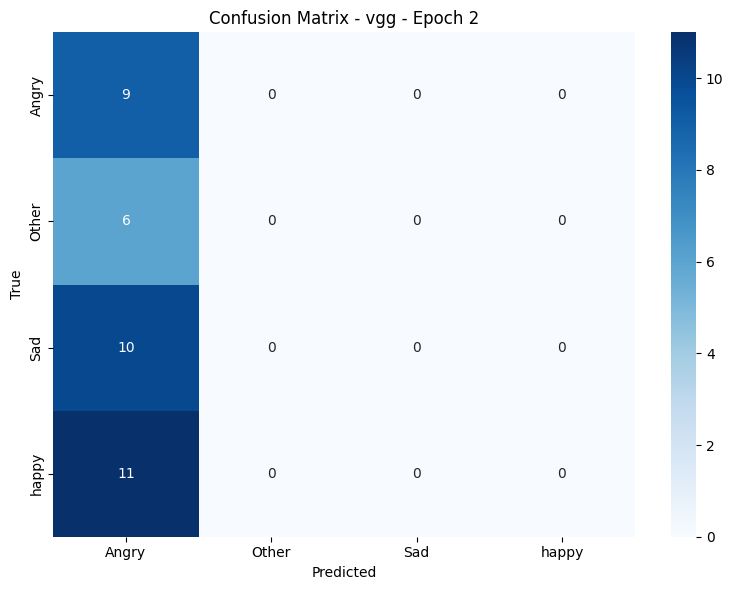

New best model saved (Accuracy: 0.2500)

Epoch [3/25] - Training Loss: 1.3868

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.0000    0.0000    0.0000         9
       Other     0.1667    1.0000    0.2857         6
         Sad     0.0000    0.0000    0.0000        10
       happy     0.0000    0.0000    0.0000        11

    accuracy                         0.1667        36
   macro avg     0.0417    0.2500    0.0714        36
weighted avg     0.0278    0.1667    0.0476        36


Confusion Matrix:
[[ 0  9  0  0]
 [ 0  6  0  0]
 [ 0 10  0  0]
 [ 0 11  0  0]]


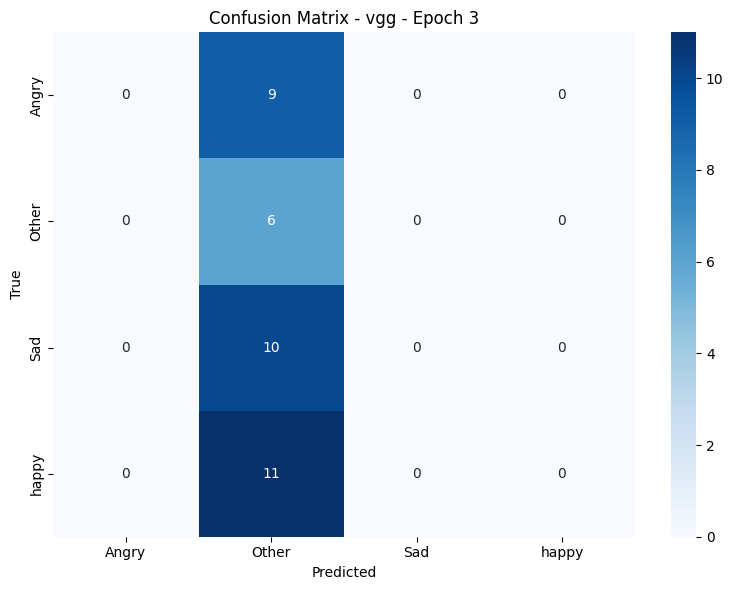


Epoch [4/25] - Training Loss: 1.3868

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.0000    0.0000    0.0000         9
       Other     0.1667    1.0000    0.2857         6
         Sad     0.0000    0.0000    0.0000        10
       happy     0.0000    0.0000    0.0000        11

    accuracy                         0.1667        36
   macro avg     0.0417    0.2500    0.0714        36
weighted avg     0.0278    0.1667    0.0476        36


Confusion Matrix:
[[ 0  9  0  0]
 [ 0  6  0  0]
 [ 0 10  0  0]
 [ 0 11  0  0]]


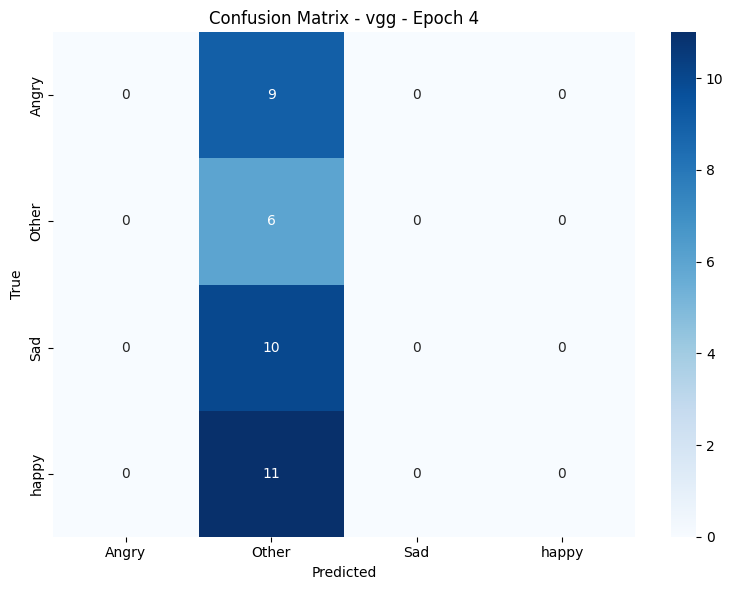


Epoch [5/25] - Training Loss: 1.3870

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.0000    0.0000    0.0000         9
       Other     0.0000    0.0000    0.0000         6
         Sad     0.2778    1.0000    0.4348        10
       happy     0.0000    0.0000    0.0000        11

    accuracy                         0.2778        36
   macro avg     0.0694    0.2500    0.1087        36
weighted avg     0.0772    0.2778    0.1208        36


Confusion Matrix:
[[ 0  0  9  0]
 [ 0  0  6  0]
 [ 0  0 10  0]
 [ 0  0 11  0]]


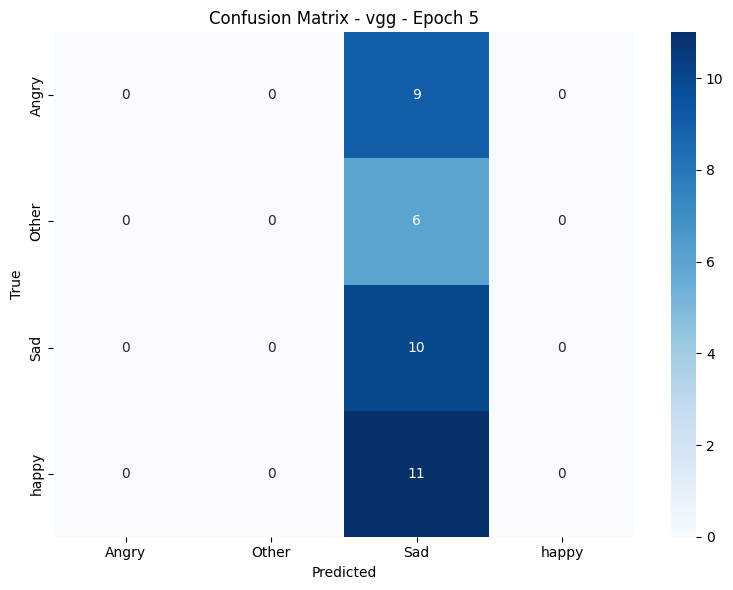

New best model saved (Accuracy: 0.2778)

Epoch [6/25] - Training Loss: 1.3864

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.2500    1.0000    0.4000         9
       Other     0.0000    0.0000    0.0000         6
         Sad     0.0000    0.0000    0.0000        10
       happy     0.0000    0.0000    0.0000        11

    accuracy                         0.2500        36
   macro avg     0.0625    0.2500    0.1000        36
weighted avg     0.0625    0.2500    0.1000        36


Confusion Matrix:
[[ 9  0  0  0]
 [ 6  0  0  0]
 [10  0  0  0]
 [11  0  0  0]]


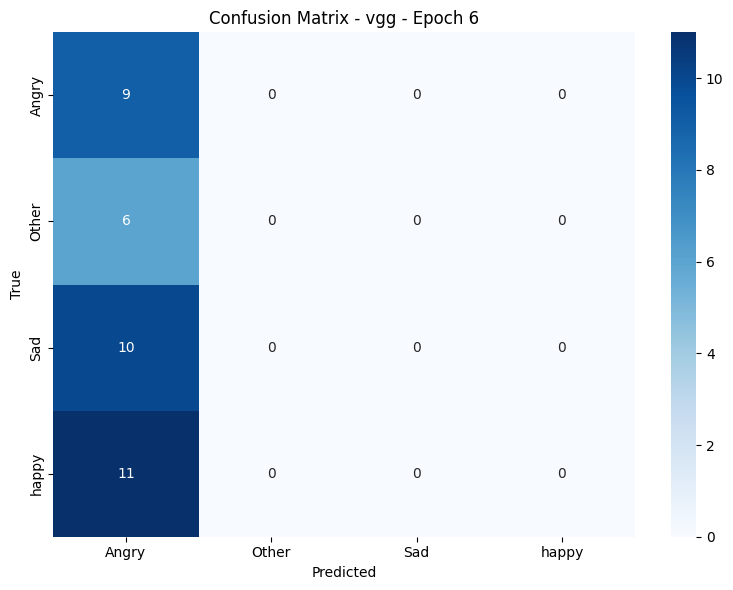


Epoch [7/25] - Training Loss: 1.3864

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.2500    1.0000    0.4000         9
       Other     0.0000    0.0000    0.0000         6
         Sad     0.0000    0.0000    0.0000        10
       happy     0.0000    0.0000    0.0000        11

    accuracy                         0.2500        36
   macro avg     0.0625    0.2500    0.1000        36
weighted avg     0.0625    0.2500    0.1000        36


Confusion Matrix:
[[ 9  0  0  0]
 [ 6  0  0  0]
 [10  0  0  0]
 [11  0  0  0]]


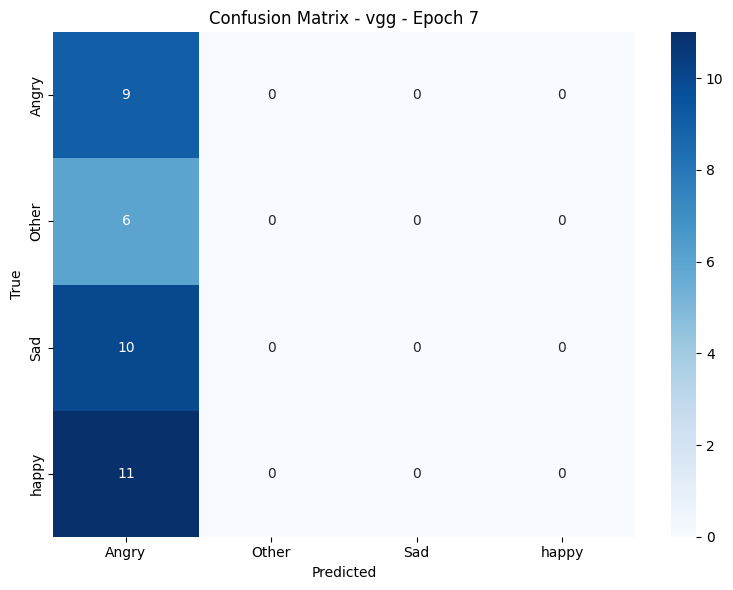


Epoch [8/25] - Training Loss: 1.3864

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.2500    1.0000    0.4000         9
       Other     0.0000    0.0000    0.0000         6
         Sad     0.0000    0.0000    0.0000        10
       happy     0.0000    0.0000    0.0000        11

    accuracy                         0.2500        36
   macro avg     0.0625    0.2500    0.1000        36
weighted avg     0.0625    0.2500    0.1000        36


Confusion Matrix:
[[ 9  0  0  0]
 [ 6  0  0  0]
 [10  0  0  0]
 [11  0  0  0]]


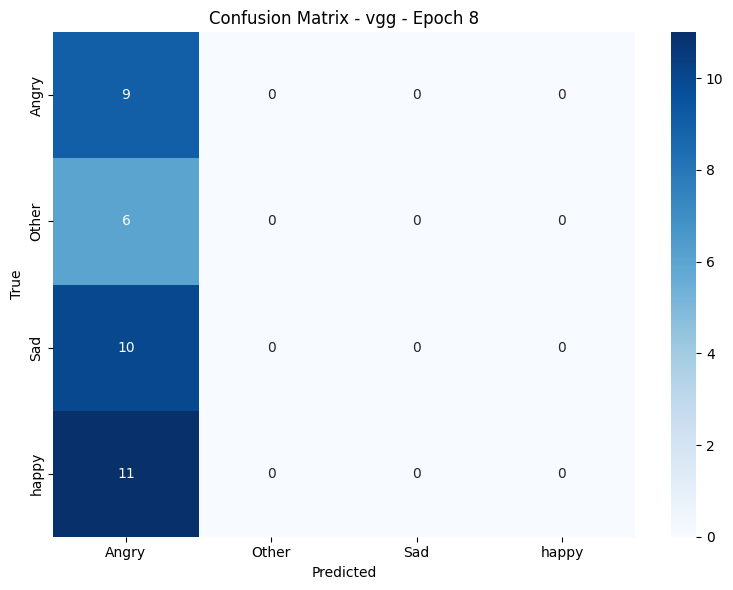


Epoch [9/25] - Training Loss: 1.3863

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.2500    1.0000    0.4000         9
       Other     0.0000    0.0000    0.0000         6
         Sad     0.0000    0.0000    0.0000        10
       happy     0.0000    0.0000    0.0000        11

    accuracy                         0.2500        36
   macro avg     0.0625    0.2500    0.1000        36
weighted avg     0.0625    0.2500    0.1000        36


Confusion Matrix:
[[ 9  0  0  0]
 [ 6  0  0  0]
 [10  0  0  0]
 [11  0  0  0]]


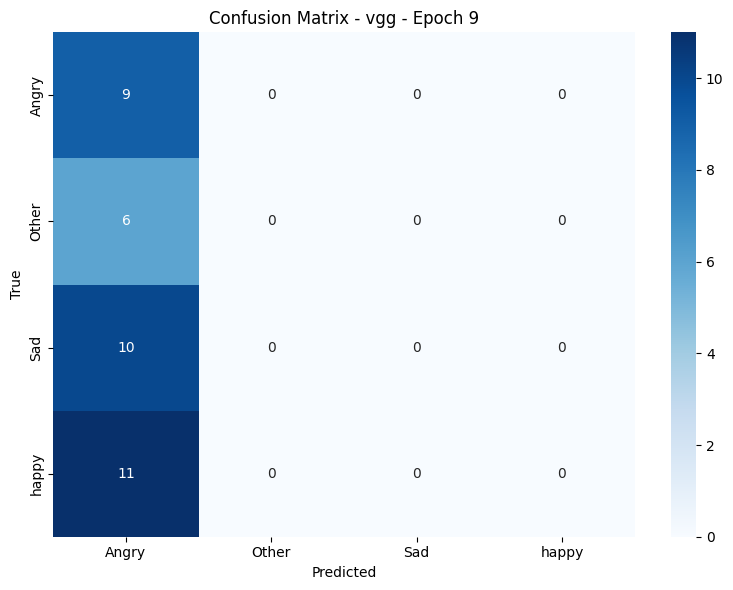


Epoch [10/25] - Training Loss: 1.3863

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.0000    0.0000    0.0000         9
       Other     0.0000    0.0000    0.0000         6
         Sad     0.2778    1.0000    0.4348        10
       happy     0.0000    0.0000    0.0000        11

    accuracy                         0.2778        36
   macro avg     0.0694    0.2500    0.1087        36
weighted avg     0.0772    0.2778    0.1208        36


Confusion Matrix:
[[ 0  0  9  0]
 [ 0  0  6  0]
 [ 0  0 10  0]
 [ 0  0 11  0]]


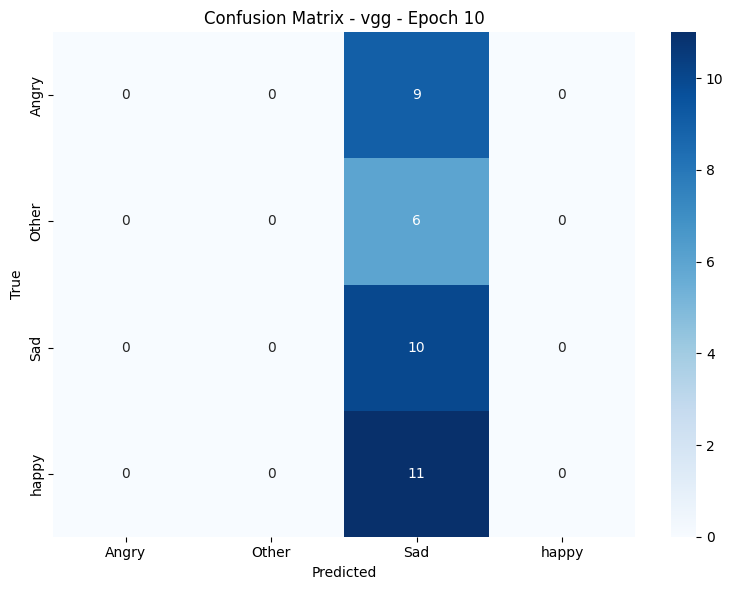


Epoch [11/25] - Training Loss: 1.3864

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.0000    0.0000    0.0000         9
       Other     0.0000    0.0000    0.0000         6
         Sad     0.2778    1.0000    0.4348        10
       happy     0.0000    0.0000    0.0000        11

    accuracy                         0.2778        36
   macro avg     0.0694    0.2500    0.1087        36
weighted avg     0.0772    0.2778    0.1208        36


Confusion Matrix:
[[ 0  0  9  0]
 [ 0  0  6  0]
 [ 0  0 10  0]
 [ 0  0 11  0]]


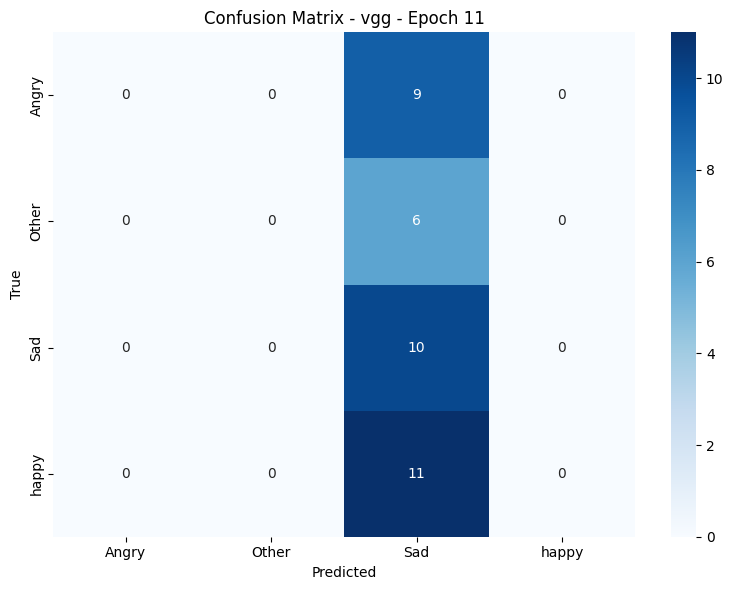


Epoch [12/25] - Training Loss: 1.3863

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.0000    0.0000    0.0000         9
       Other     0.0000    0.0000    0.0000         6
         Sad     0.2778    1.0000    0.4348        10
       happy     0.0000    0.0000    0.0000        11

    accuracy                         0.2778        36
   macro avg     0.0694    0.2500    0.1087        36
weighted avg     0.0772    0.2778    0.1208        36


Confusion Matrix:
[[ 0  0  9  0]
 [ 0  0  6  0]
 [ 0  0 10  0]
 [ 0  0 11  0]]


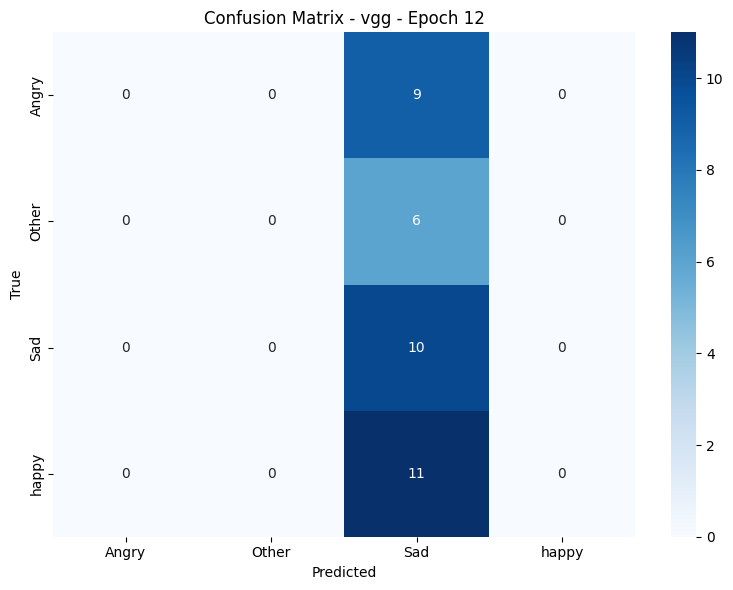


Epoch [13/25] - Training Loss: 1.3862

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.0000    0.0000    0.0000         9
       Other     0.0000    0.0000    0.0000         6
         Sad     0.2778    1.0000    0.4348        10
       happy     0.0000    0.0000    0.0000        11

    accuracy                         0.2778        36
   macro avg     0.0694    0.2500    0.1087        36
weighted avg     0.0772    0.2778    0.1208        36


Confusion Matrix:
[[ 0  0  9  0]
 [ 0  0  6  0]
 [ 0  0 10  0]
 [ 0  0 11  0]]


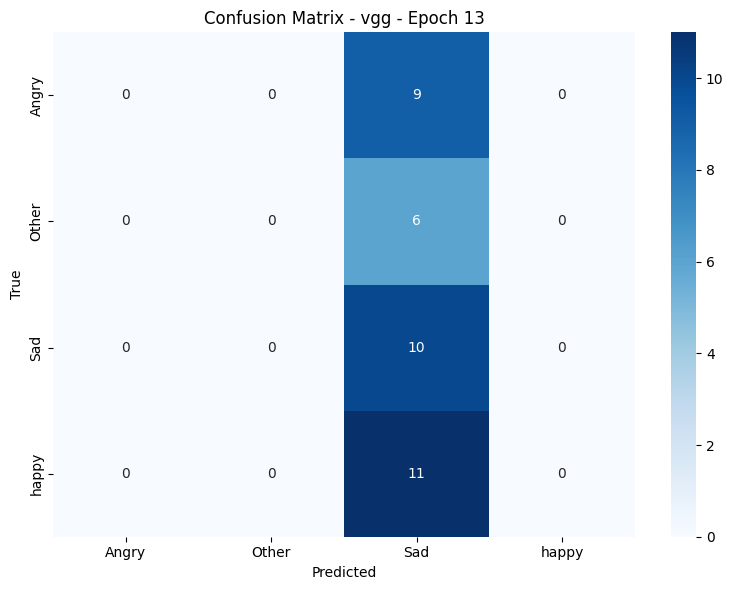


Epoch [14/25] - Training Loss: 1.3865

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.0000    0.0000    0.0000         9
       Other     0.0000    0.0000    0.0000         6
         Sad     0.2778    1.0000    0.4348        10
       happy     0.0000    0.0000    0.0000        11

    accuracy                         0.2778        36
   macro avg     0.0694    0.2500    0.1087        36
weighted avg     0.0772    0.2778    0.1208        36


Confusion Matrix:
[[ 0  0  9  0]
 [ 0  0  6  0]
 [ 0  0 10  0]
 [ 0  0 11  0]]


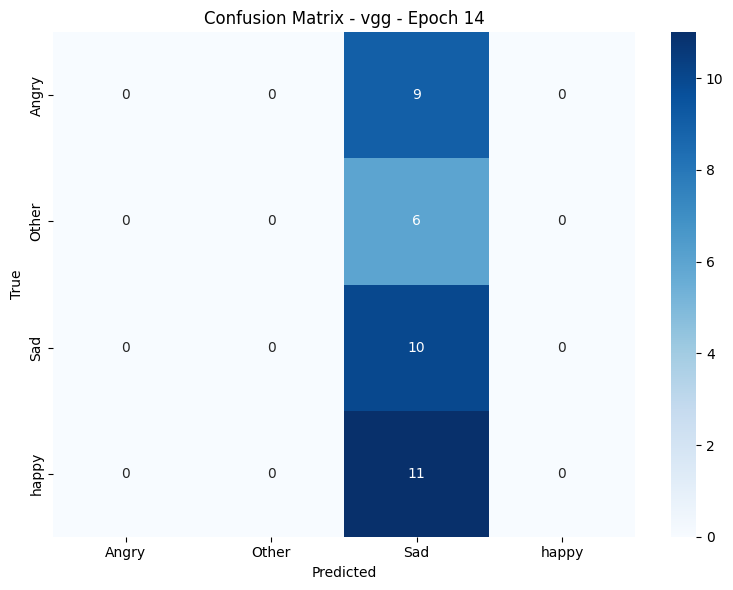


Epoch [15/25] - Training Loss: 1.3864

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.0000    0.0000    0.0000         9
       Other     0.0000    0.0000    0.0000         6
         Sad     0.2778    1.0000    0.4348        10
       happy     0.0000    0.0000    0.0000        11

    accuracy                         0.2778        36
   macro avg     0.0694    0.2500    0.1087        36
weighted avg     0.0772    0.2778    0.1208        36


Confusion Matrix:
[[ 0  0  9  0]
 [ 0  0  6  0]
 [ 0  0 10  0]
 [ 0  0 11  0]]


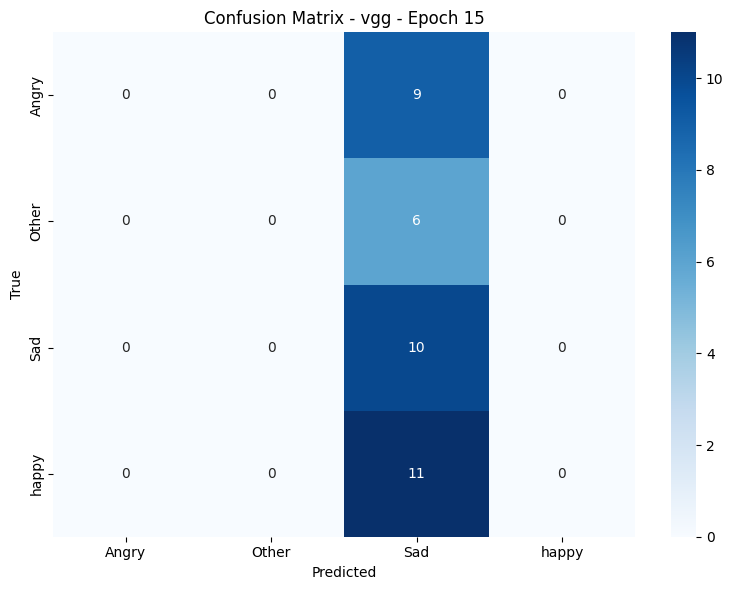


Epoch [16/25] - Training Loss: 1.3862

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.0000    0.0000    0.0000         9
       Other     0.0000    0.0000    0.0000         6
         Sad     0.2778    1.0000    0.4348        10
       happy     0.0000    0.0000    0.0000        11

    accuracy                         0.2778        36
   macro avg     0.0694    0.2500    0.1087        36
weighted avg     0.0772    0.2778    0.1208        36


Confusion Matrix:
[[ 0  0  9  0]
 [ 0  0  6  0]
 [ 0  0 10  0]
 [ 0  0 11  0]]


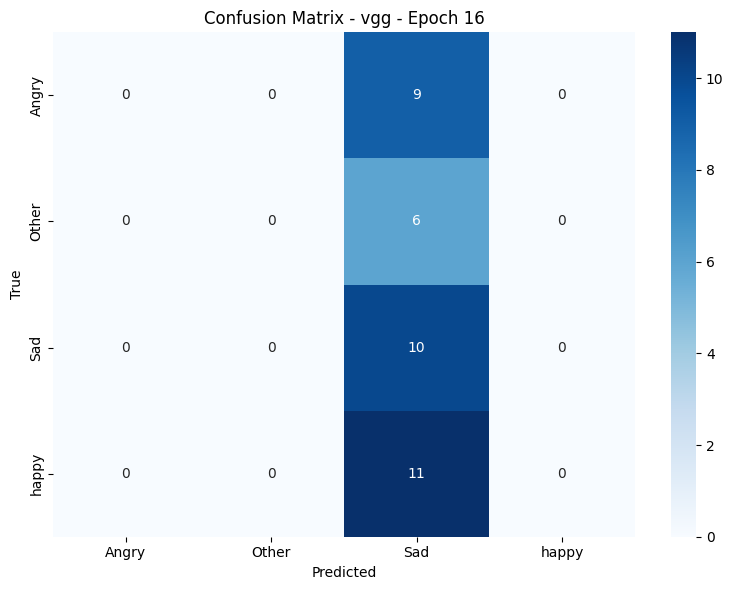


Epoch [17/25] - Training Loss: 1.3862

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.0000    0.0000    0.0000         9
       Other     0.0000    0.0000    0.0000         6
         Sad     0.2778    1.0000    0.4348        10
       happy     0.0000    0.0000    0.0000        11

    accuracy                         0.2778        36
   macro avg     0.0694    0.2500    0.1087        36
weighted avg     0.0772    0.2778    0.1208        36


Confusion Matrix:
[[ 0  0  9  0]
 [ 0  0  6  0]
 [ 0  0 10  0]
 [ 0  0 11  0]]


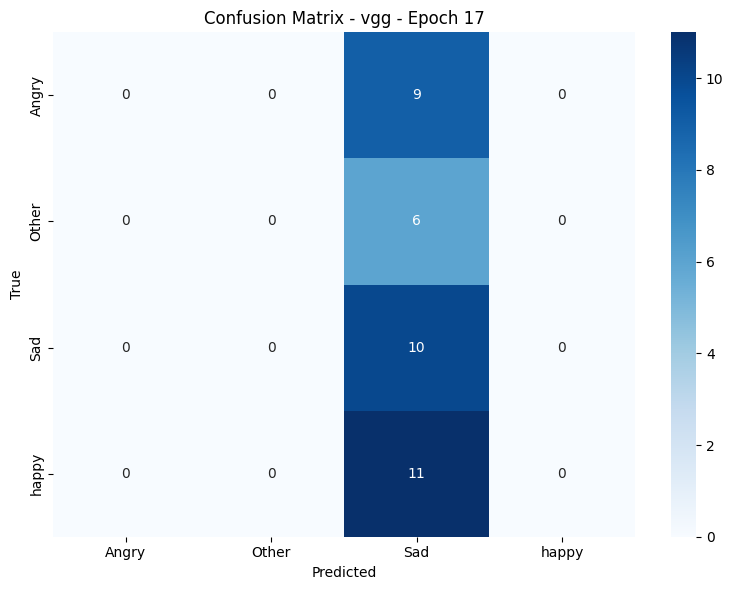


Epoch [18/25] - Training Loss: 1.3864

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.0000    0.0000    0.0000         9
       Other     0.0000    0.0000    0.0000         6
         Sad     0.2778    1.0000    0.4348        10
       happy     0.0000    0.0000    0.0000        11

    accuracy                         0.2778        36
   macro avg     0.0694    0.2500    0.1087        36
weighted avg     0.0772    0.2778    0.1208        36


Confusion Matrix:
[[ 0  0  9  0]
 [ 0  0  6  0]
 [ 0  0 10  0]
 [ 0  0 11  0]]


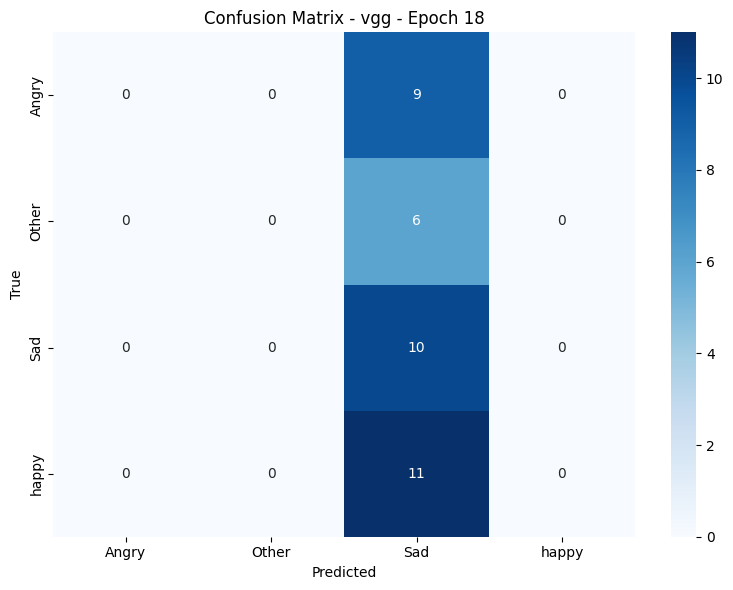


Epoch [19/25] - Training Loss: 1.3864

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.0000    0.0000    0.0000         9
       Other     0.0000    0.0000    0.0000         6
         Sad     0.2778    1.0000    0.4348        10
       happy     0.0000    0.0000    0.0000        11

    accuracy                         0.2778        36
   macro avg     0.0694    0.2500    0.1087        36
weighted avg     0.0772    0.2778    0.1208        36


Confusion Matrix:
[[ 0  0  9  0]
 [ 0  0  6  0]
 [ 0  0 10  0]
 [ 0  0 11  0]]


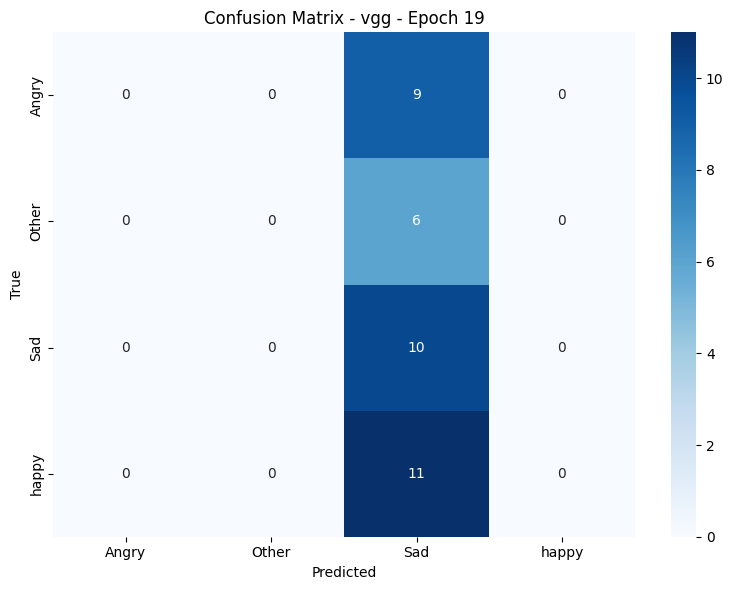


Epoch [20/25] - Training Loss: 1.3864

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.0000    0.0000    0.0000         9
       Other     0.0000    0.0000    0.0000         6
         Sad     0.2778    1.0000    0.4348        10
       happy     0.0000    0.0000    0.0000        11

    accuracy                         0.2778        36
   macro avg     0.0694    0.2500    0.1087        36
weighted avg     0.0772    0.2778    0.1208        36


Confusion Matrix:
[[ 0  0  9  0]
 [ 0  0  6  0]
 [ 0  0 10  0]
 [ 0  0 11  0]]


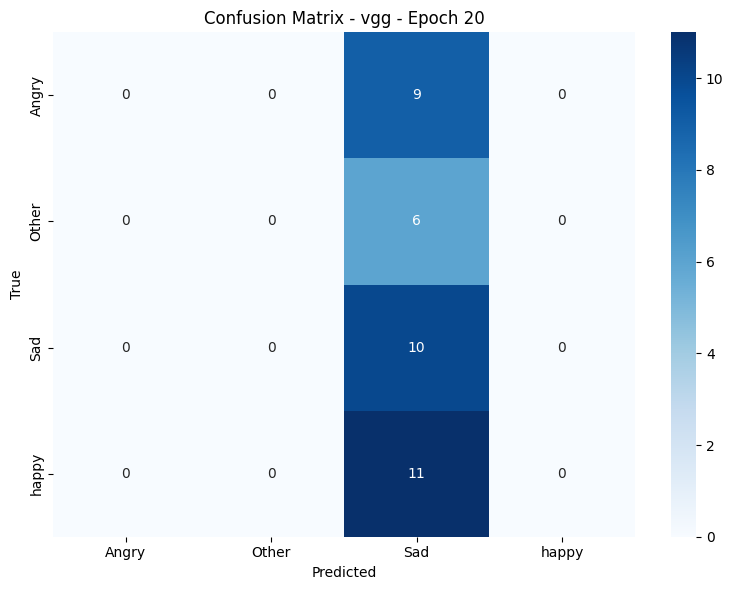


Epoch [21/25] - Training Loss: 1.3865

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.0000    0.0000    0.0000         9
       Other     0.0000    0.0000    0.0000         6
         Sad     0.2778    1.0000    0.4348        10
       happy     0.0000    0.0000    0.0000        11

    accuracy                         0.2778        36
   macro avg     0.0694    0.2500    0.1087        36
weighted avg     0.0772    0.2778    0.1208        36


Confusion Matrix:
[[ 0  0  9  0]
 [ 0  0  6  0]
 [ 0  0 10  0]
 [ 0  0 11  0]]


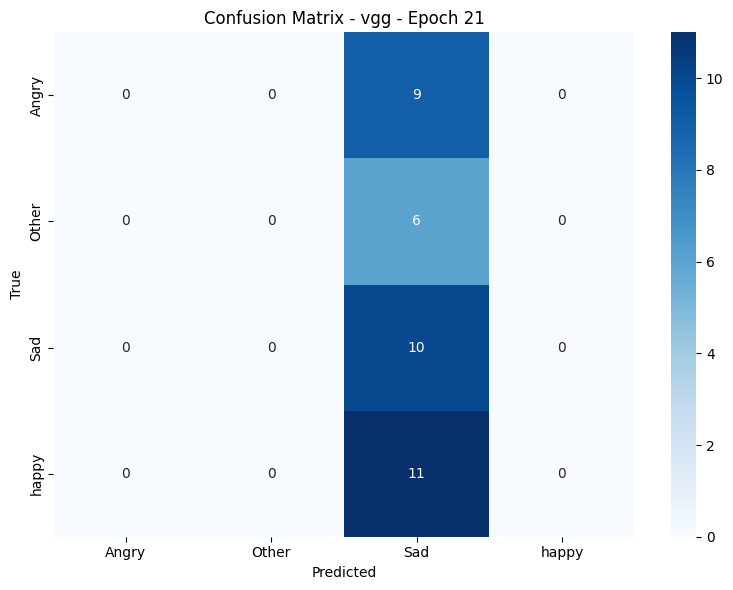


Epoch [22/25] - Training Loss: 1.3864

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.0000    0.0000    0.0000         9
       Other     0.0000    0.0000    0.0000         6
         Sad     0.2778    1.0000    0.4348        10
       happy     0.0000    0.0000    0.0000        11

    accuracy                         0.2778        36
   macro avg     0.0694    0.2500    0.1087        36
weighted avg     0.0772    0.2778    0.1208        36


Confusion Matrix:
[[ 0  0  9  0]
 [ 0  0  6  0]
 [ 0  0 10  0]
 [ 0  0 11  0]]


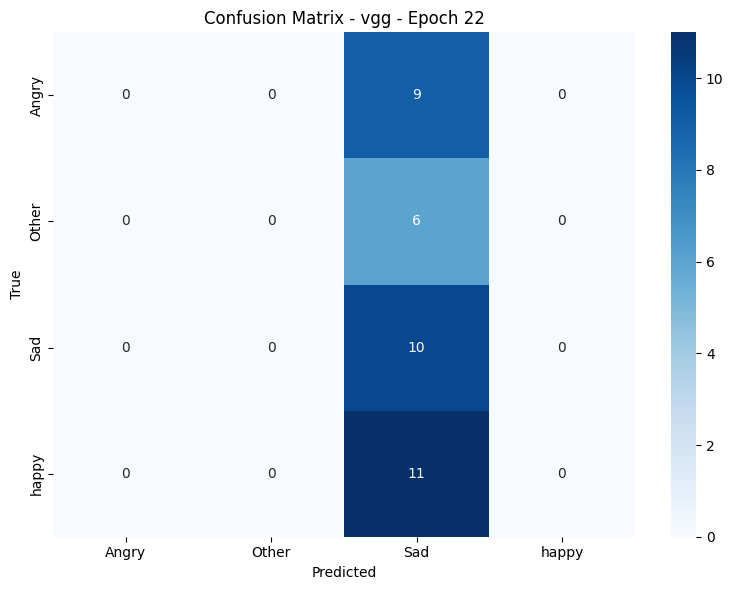


Epoch [23/25] - Training Loss: 1.3864

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.0000    0.0000    0.0000         9
       Other     0.0000    0.0000    0.0000         6
         Sad     0.2778    1.0000    0.4348        10
       happy     0.0000    0.0000    0.0000        11

    accuracy                         0.2778        36
   macro avg     0.0694    0.2500    0.1087        36
weighted avg     0.0772    0.2778    0.1208        36


Confusion Matrix:
[[ 0  0  9  0]
 [ 0  0  6  0]
 [ 0  0 10  0]
 [ 0  0 11  0]]


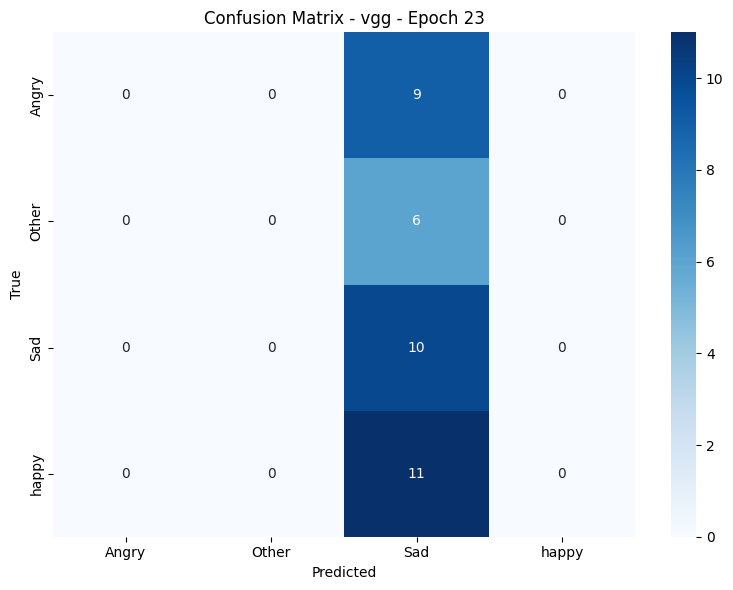


Epoch [24/25] - Training Loss: 1.3865

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.0000    0.0000    0.0000         9
       Other     0.0000    0.0000    0.0000         6
         Sad     0.2778    1.0000    0.4348        10
       happy     0.0000    0.0000    0.0000        11

    accuracy                         0.2778        36
   macro avg     0.0694    0.2500    0.1087        36
weighted avg     0.0772    0.2778    0.1208        36


Confusion Matrix:
[[ 0  0  9  0]
 [ 0  0  6  0]
 [ 0  0 10  0]
 [ 0  0 11  0]]


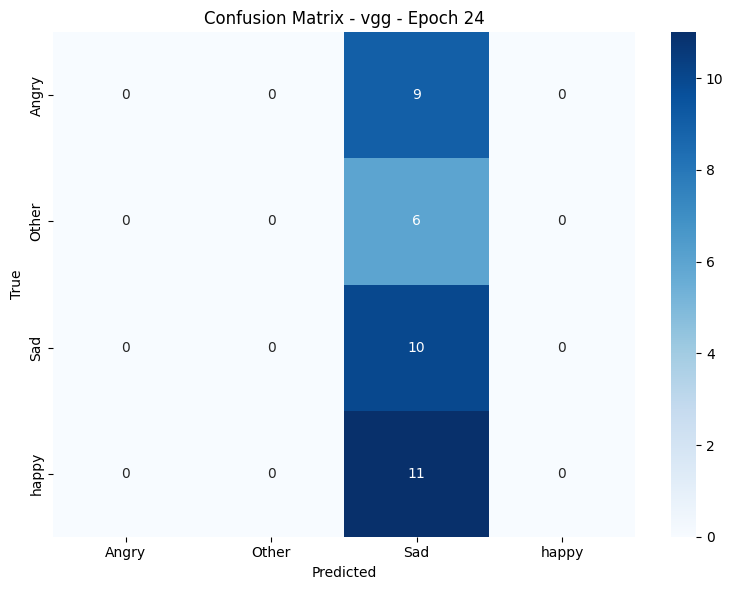


Epoch [25/25] - Training Loss: 1.3863

Validation Classification Report:
               precision    recall  f1-score   support

       Angry     0.0000    0.0000    0.0000         9
       Other     0.0000    0.0000    0.0000         6
         Sad     0.2778    1.0000    0.4348        10
       happy     0.0000    0.0000    0.0000        11

    accuracy                         0.2778        36
   macro avg     0.0694    0.2500    0.1087        36
weighted avg     0.0772    0.2778    0.1208        36


Confusion Matrix:
[[ 0  0  9  0]
 [ 0  0  6  0]
 [ 0  0 10  0]
 [ 0  0 11  0]]


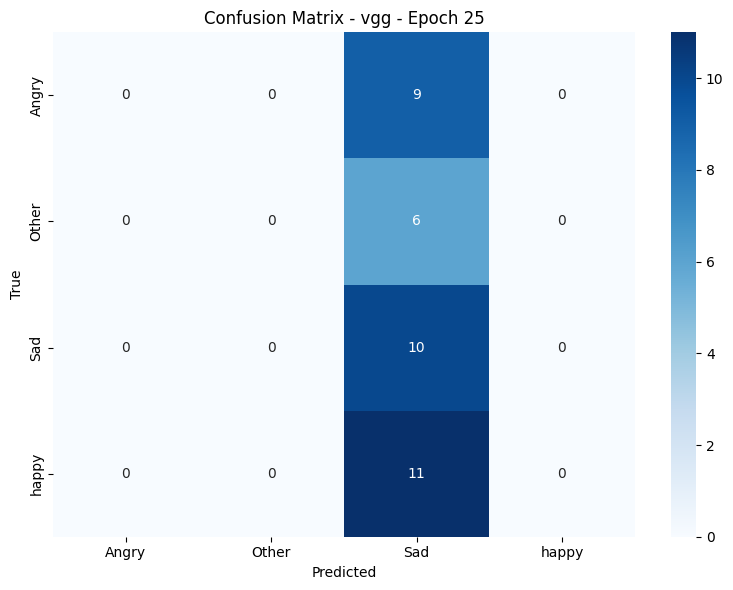

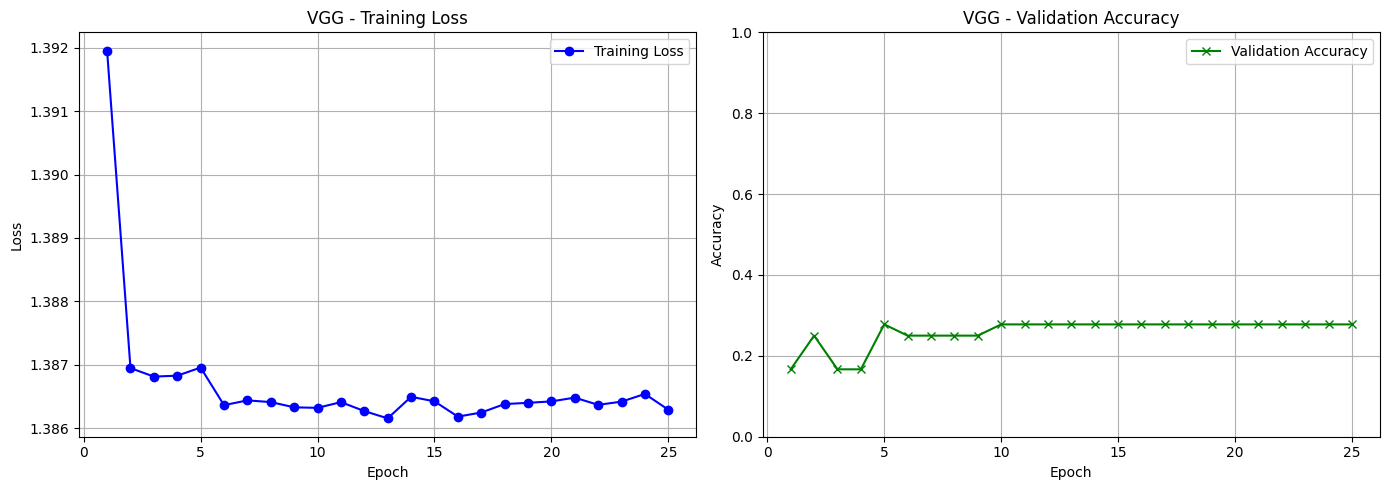


Training complete. Best validation accuracy: 0.2778



In [9]:
model_name = 'vgg'  # Change to: vgg, resnet, mobilenet, inception, densenet
model_class = model_map[model_name]
#model = model_map[model_name](num_classes=num_classes).to(device)
train_and_evaluate_model(
        model_name=model_name,
        model_class=model_class,
        num_classes=num_classes,
        device=device,
        train_loader=train_loader,
        val_loader=val_loader,
        class_names=class_names,
        epochs=25,
        lr=1e-3
    )